# The big Question

use machine learning to process and transform Titanic data to create a model. This model must predict which people are likely to survive with 80% or greater accuracy.

## A little dive into the data

- Two classes either True (1) and not False (0)
- supervised learning problem
- **Classification** problem since target is categorical
- 10 **features** 
- **target** variable is the Survived
- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

To get full description  **[visit](https://data.world/nrippner/titanic-disaster-dataset)**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [3]:
train.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [4]:
test.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47,62,27,22
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


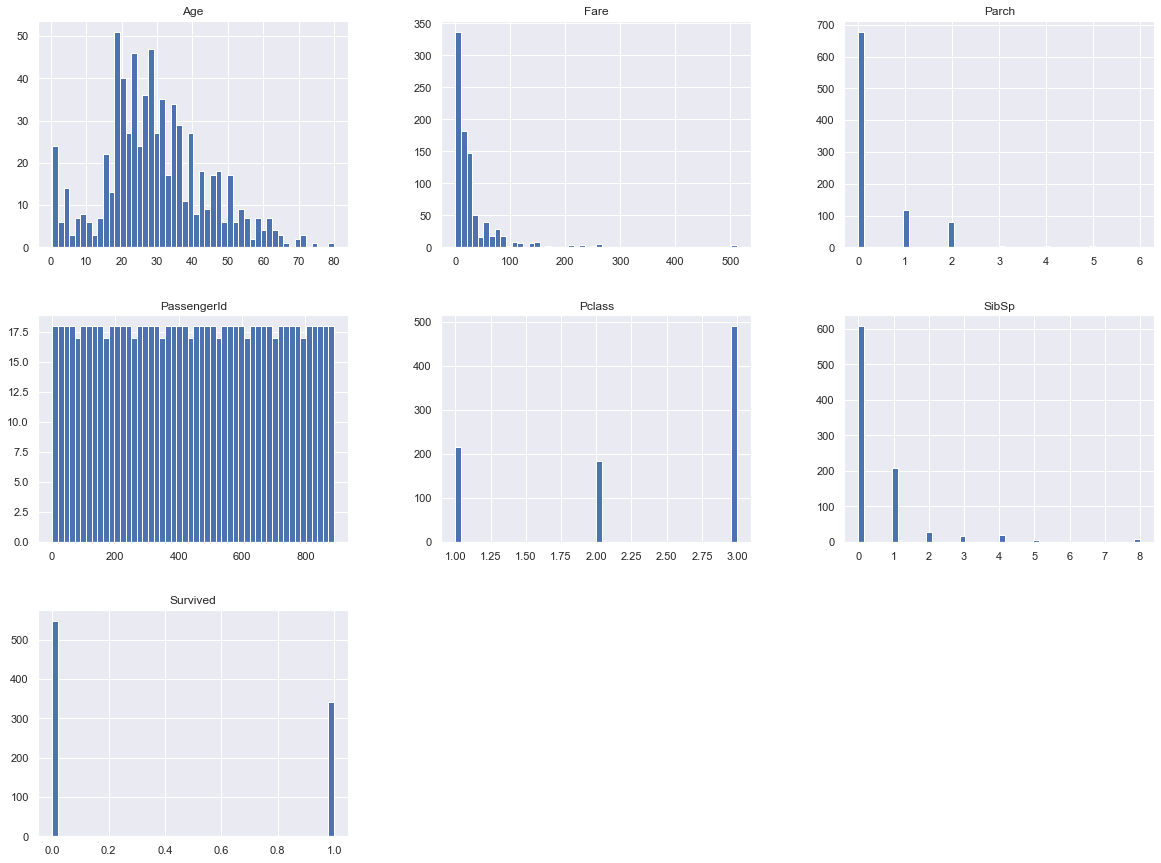

In [7]:
train.hist(bins=50, figsize=(20,15))
plt.show()

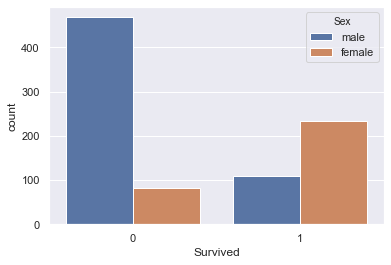

In [8]:
sns.countplot(x='Survived', hue='Sex', data=train)

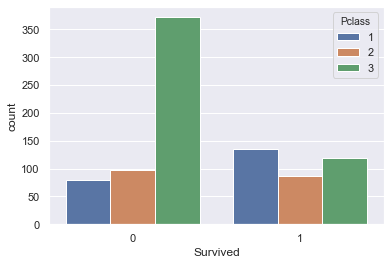

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=train)

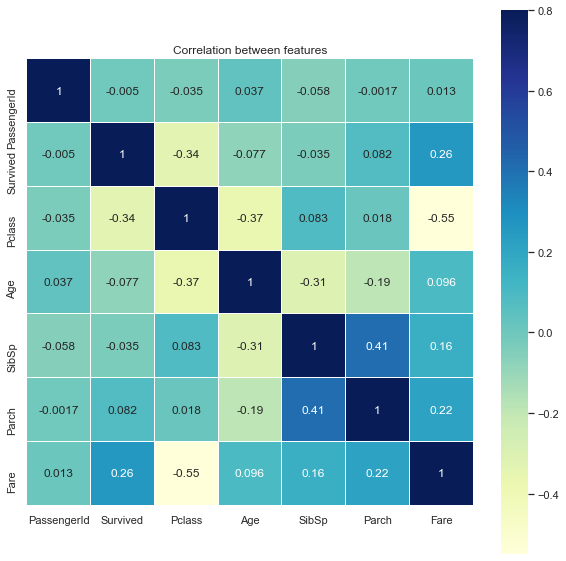

In [10]:
corr=train.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [11]:
#correlation of features with target variable
train.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Handling missing data

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**missing categorical data in**

train: cabin and embarked
test: cabin

**missing numerical data in**

train: age
test: age, fare

In [15]:
# the missing data in the cabin column is too much,
# and Name, Ticket columns are uselessso we drop them

train.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
test.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [17]:
num_attribs = list(train.drop(['Embarked','Sex'], axis=1))
cat_attribs = ['Embarked','Sex']
num_attribs_test = list(test.drop(['Embarked','Sex'], axis=1))

In [18]:
imputer =  SimpleImputer(strategy='most_frequent')
train['Embarked'] = imputer.fit_transform((train['Embarked'].values).reshape(-1, 1))

imputer2 = SimpleImputer(strategy="median")

train[num_attribs] = imputer2.fit_transform(train[num_attribs])
test[num_attribs_test] = imputer2.fit_transform(test[num_attribs_test])



In [19]:
labelEnc=LabelEncoder()

for col in cat_attribs:
    train[col]=labelEnc.fit_transform(train[col])
    test[col]=labelEnc.fit_transform(test[col])

In [20]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [21]:
corr_matrix= train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

## train, val, test split

In [22]:
from sklearn.model_selection import train_test_split

target="Survived"
y= train[target]
X= train.drop(target, axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test= test
#y_train= y_train.values
#y_val= y_val.values

In [23]:
std_scaler = StandardScaler()

X_train_prep = std_scaler.fit_transform(X_train)
X_val_prep= std_scaler.fit_transform(X_val)
X_test_prep = std_scaler.fit_transform(X_test)

In [24]:
print(X_train_prep.shape)
print(X_val_prep.shape)
print(X_test_prep.shape)
print(y_train.shape)
print(y_val.shape)

(712, 8)
(179, 8)
(418, 8)
(712,)
(179,)


## model creation

In [25]:
from Ml_models_getter import Ml_classification_getter
m= Ml_classification_getter(X_train_prep, y_train, X_val_prep, y_val)

In [26]:
m.models_getter()

		 training	validating
NAME		 ACCURACY	ACCURACY	PRECISION	RECALL		   AUC		 CV_MEAN (CV_STD)
-------------------------------------------------------------------------------------------------------------------------------
log_reg:	80.477528	79.888268	78.787879	70.270270	87.464607	79.489437 (7.981792)
-------------------------------------------------------------------------------------------------------------------------------
tree_clf:	100.000000	77.094972	73.239437	70.270270	76.087516	72.746479 (5.925834)
-------------------------------------------------------------------------------------------------------------------------------
forest_clf:	100.000000	81.564246	78.873239	75.675676	87.625483	81.455399 (6.484197)
-------------------------------------------------------------------------------------------------------------------------------
svm_clf:	83.988764	81.005587	81.250000	70.270270	83.693694	82.024648 (7.917624)
----------------------------------------------------------------------

In [27]:
m.c_matrix_getter()

['log_reg', array([[91, 14],
       [22, 52]], dtype=int64)]
--------------------------------------
['tree_clf', array([[86, 19],
       [22, 52]], dtype=int64)]
--------------------------------------
['forest_clf', array([[90, 15],
       [18, 56]], dtype=int64)]
--------------------------------------
['svm_clf', array([[93, 12],
       [22, 52]], dtype=int64)]
--------------------------------------
['sgd_clf', array([[89, 16],
       [18, 56]], dtype=int64)]
--------------------------------------
['nbayes_clf', array([[87, 18],
       [23, 51]], dtype=int64)]
--------------------------------------
['knn_clf', array([[92, 13],
       [22, 52]], dtype=int64)]
--------------------------------------


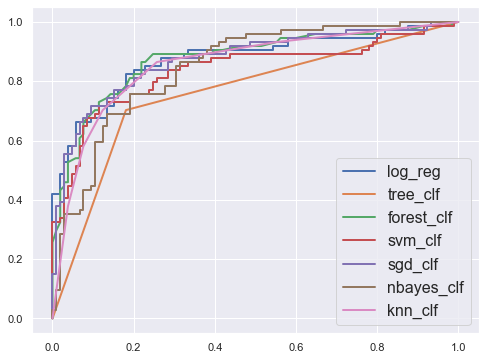

In [28]:
m.roc_curve_getter()

In [29]:
m.ensemble_models_getter()

Learning rate set to 0.008911
0:	learn: 0.6869140	total: 93.5ms	remaining: 1m 33s
1:	learn: 0.6813866	total: 98.4ms	remaining: 49.1s
2:	learn: 0.6753415	total: 103ms	remaining: 34.3s
3:	learn: 0.6702370	total: 106ms	remaining: 26.3s
4:	learn: 0.6644318	total: 110ms	remaining: 21.9s
5:	learn: 0.6588288	total: 113ms	remaining: 18.8s
6:	learn: 0.6538951	total: 117ms	remaining: 16.5s
7:	learn: 0.6490694	total: 126ms	remaining: 15.7s
8:	learn: 0.6433040	total: 133ms	remaining: 14.7s
9:	learn: 0.6384312	total: 143ms	remaining: 14.1s
10:	learn: 0.6330818	total: 147ms	remaining: 13.2s
11:	learn: 0.6302676	total: 150ms	remaining: 12.4s
12:	learn: 0.6256224	total: 155ms	remaining: 11.8s
13:	learn: 0.6206207	total: 160ms	remaining: 11.3s
14:	learn: 0.6156128	total: 163ms	remaining: 10.7s
15:	learn: 0.6115741	total: 165ms	remaining: 10.2s
16:	learn: 0.6073917	total: 174ms	remaining: 10.1s
17:	learn: 0.6048007	total: 177ms	remaining: 9.65s
18:	learn: 0.6005206	total: 184ms	remaining: 9.51s
19:	lear

173:	learn: 0.3894020	total: 1.12s	remaining: 5.33s
174:	learn: 0.3888590	total: 1.13s	remaining: 5.31s
175:	learn: 0.3882243	total: 1.13s	remaining: 5.3s
176:	learn: 0.3878308	total: 1.13s	remaining: 5.28s
177:	learn: 0.3877188	total: 1.14s	remaining: 5.25s
178:	learn: 0.3870781	total: 1.14s	remaining: 5.23s
179:	learn: 0.3867731	total: 1.14s	remaining: 5.21s
180:	learn: 0.3863130	total: 1.16s	remaining: 5.24s
181:	learn: 0.3860799	total: 1.16s	remaining: 5.23s
182:	learn: 0.3858391	total: 1.17s	remaining: 5.21s
183:	learn: 0.3855459	total: 1.17s	remaining: 5.19s
184:	learn: 0.3853846	total: 1.17s	remaining: 5.17s
185:	learn: 0.3848623	total: 1.18s	remaining: 5.15s
186:	learn: 0.3846752	total: 1.18s	remaining: 5.13s
187:	learn: 0.3841062	total: 1.18s	remaining: 5.11s
188:	learn: 0.3840633	total: 1.18s	remaining: 5.08s
189:	learn: 0.3835975	total: 1.19s	remaining: 5.07s
190:	learn: 0.3834967	total: 1.19s	remaining: 5.04s
191:	learn: 0.3833037	total: 1.22s	remaining: 5.13s
192:	learn: 0

347:	learn: 0.3449706	total: 2.34s	remaining: 4.38s
348:	learn: 0.3447396	total: 2.34s	remaining: 4.36s
349:	learn: 0.3445756	total: 2.34s	remaining: 4.35s
350:	learn: 0.3443447	total: 2.38s	remaining: 4.4s
351:	learn: 0.3441211	total: 2.39s	remaining: 4.39s
352:	learn: 0.3439005	total: 2.39s	remaining: 4.38s
353:	learn: 0.3438560	total: 2.39s	remaining: 4.37s
354:	learn: 0.3437914	total: 2.4s	remaining: 4.35s
355:	learn: 0.3435593	total: 2.4s	remaining: 4.34s
356:	learn: 0.3434131	total: 2.4s	remaining: 4.33s
357:	learn: 0.3432742	total: 2.41s	remaining: 4.32s
358:	learn: 0.3429109	total: 2.41s	remaining: 4.31s
359:	learn: 0.3427481	total: 2.42s	remaining: 4.29s
360:	learn: 0.3425698	total: 2.43s	remaining: 4.3s
361:	learn: 0.3424515	total: 2.45s	remaining: 4.32s
362:	learn: 0.3424316	total: 2.45s	remaining: 4.3s
363:	learn: 0.3422369	total: 2.46s	remaining: 4.29s
364:	learn: 0.3419178	total: 2.46s	remaining: 4.28s
365:	learn: 0.3416962	total: 2.46s	remaining: 4.26s
366:	learn: 0.3414

531:	learn: 0.3159880	total: 3.48s	remaining: 3.06s
532:	learn: 0.3158519	total: 3.49s	remaining: 3.06s
533:	learn: 0.3157252	total: 3.49s	remaining: 3.05s
534:	learn: 0.3154853	total: 3.5s	remaining: 3.05s
535:	learn: 0.3153081	total: 3.51s	remaining: 3.04s
536:	learn: 0.3152036	total: 3.59s	remaining: 3.09s
537:	learn: 0.3151709	total: 3.59s	remaining: 3.08s
538:	learn: 0.3149552	total: 3.59s	remaining: 3.07s
539:	learn: 0.3148384	total: 3.6s	remaining: 3.06s
540:	learn: 0.3147397	total: 3.6s	remaining: 3.06s
541:	learn: 0.3145110	total: 3.6s	remaining: 3.04s
542:	learn: 0.3144911	total: 3.61s	remaining: 3.04s
543:	learn: 0.3144409	total: 3.61s	remaining: 3.03s
544:	learn: 0.3143437	total: 3.62s	remaining: 3.02s
545:	learn: 0.3141804	total: 3.64s	remaining: 3.03s
546:	learn: 0.3139580	total: 3.65s	remaining: 3.03s
547:	learn: 0.3138146	total: 3.66s	remaining: 3.02s
548:	learn: 0.3136623	total: 3.66s	remaining: 3.01s
549:	learn: 0.3135815	total: 3.67s	remaining: 3s
550:	learn: 0.31345

711:	learn: 0.2917676	total: 4.68s	remaining: 1.89s
712:	learn: 0.2914980	total: 4.68s	remaining: 1.89s
713:	learn: 0.2913977	total: 4.69s	remaining: 1.88s
714:	learn: 0.2912601	total: 4.69s	remaining: 1.87s
715:	learn: 0.2912540	total: 4.7s	remaining: 1.86s
716:	learn: 0.2912329	total: 4.7s	remaining: 1.85s
717:	learn: 0.2910711	total: 4.7s	remaining: 1.85s
718:	learn: 0.2909051	total: 4.71s	remaining: 1.84s
719:	learn: 0.2907905	total: 4.71s	remaining: 1.83s
720:	learn: 0.2906242	total: 4.71s	remaining: 1.82s
721:	learn: 0.2905267	total: 4.8s	remaining: 1.85s
722:	learn: 0.2903766	total: 4.8s	remaining: 1.84s
723:	learn: 0.2902292	total: 4.81s	remaining: 1.83s
724:	learn: 0.2898821	total: 4.81s	remaining: 1.82s
725:	learn: 0.2897449	total: 4.82s	remaining: 1.82s
726:	learn: 0.2896063	total: 4.83s	remaining: 1.81s
727:	learn: 0.2895043	total: 4.83s	remaining: 1.8s
728:	learn: 0.2893872	total: 4.84s	remaining: 1.8s
729:	learn: 0.2892230	total: 4.84s	remaining: 1.79s
730:	learn: 0.28905

892:	learn: 0.2672754	total: 5.88s	remaining: 705ms
893:	learn: 0.2671971	total: 5.91s	remaining: 701ms
894:	learn: 0.2670620	total: 5.92s	remaining: 694ms
895:	learn: 0.2669402	total: 5.92s	remaining: 687ms
896:	learn: 0.2668188	total: 5.92s	remaining: 680ms
897:	learn: 0.2667253	total: 5.93s	remaining: 673ms
898:	learn: 0.2666435	total: 5.93s	remaining: 666ms
899:	learn: 0.2664599	total: 5.93s	remaining: 660ms
900:	learn: 0.2662270	total: 5.94s	remaining: 653ms
901:	learn: 0.2659911	total: 5.94s	remaining: 646ms
902:	learn: 0.2658319	total: 5.96s	remaining: 640ms
903:	learn: 0.2657453	total: 5.96s	remaining: 633ms
904:	learn: 0.2655709	total: 5.97s	remaining: 627ms
905:	learn: 0.2654763	total: 5.97s	remaining: 620ms
906:	learn: 0.2652611	total: 5.99s	remaining: 614ms
907:	learn: 0.2651309	total: 5.99s	remaining: 607ms
908:	learn: 0.2648779	total: 6.01s	remaining: 601ms
909:	learn: 0.2647545	total: 6.03s	remaining: 596ms
910:	learn: 0.2645817	total: 6.04s	remaining: 590ms
911:	learn: 

74:	learn: 0.4825930	total: 341ms	remaining: 4.21s
75:	learn: 0.4808540	total: 345ms	remaining: 4.2s
76:	learn: 0.4790833	total: 349ms	remaining: 4.18s
77:	learn: 0.4780023	total: 353ms	remaining: 4.18s
78:	learn: 0.4761752	total: 357ms	remaining: 4.17s
79:	learn: 0.4742782	total: 361ms	remaining: 4.15s
80:	learn: 0.4722654	total: 399ms	remaining: 4.52s
81:	learn: 0.4716961	total: 401ms	remaining: 4.48s
82:	learn: 0.4702036	total: 406ms	remaining: 4.48s
83:	learn: 0.4692620	total: 408ms	remaining: 4.45s
84:	learn: 0.4676087	total: 413ms	remaining: 4.44s
85:	learn: 0.4659231	total: 417ms	remaining: 4.43s
86:	learn: 0.4647382	total: 421ms	remaining: 4.41s
87:	learn: 0.4639065	total: 424ms	remaining: 4.39s
88:	learn: 0.4623837	total: 427ms	remaining: 4.37s
89:	learn: 0.4615093	total: 429ms	remaining: 4.34s
90:	learn: 0.4597079	total: 440ms	remaining: 4.4s
91:	learn: 0.4581381	total: 445ms	remaining: 4.39s
92:	learn: 0.4576870	total: 446ms	remaining: 4.35s
93:	learn: 0.4562506	total: 450ms

244:	learn: 0.3736785	total: 1.29s	remaining: 3.98s
245:	learn: 0.3736461	total: 1.29s	remaining: 3.97s
246:	learn: 0.3733383	total: 1.3s	remaining: 3.96s
247:	learn: 0.3730609	total: 1.3s	remaining: 3.95s
248:	learn: 0.3728161	total: 1.31s	remaining: 3.94s
249:	learn: 0.3726786	total: 1.32s	remaining: 3.98s
250:	learn: 0.3723311	total: 1.33s	remaining: 3.98s
251:	learn: 0.3720214	total: 1.34s	remaining: 3.98s
252:	learn: 0.3716703	total: 1.37s	remaining: 4.04s
253:	learn: 0.3714790	total: 1.37s	remaining: 4.03s
254:	learn: 0.3711260	total: 1.38s	remaining: 4.03s
255:	learn: 0.3709420	total: 1.38s	remaining: 4.01s
256:	learn: 0.3709141	total: 1.38s	remaining: 4s
257:	learn: 0.3705729	total: 1.39s	remaining: 3.99s
258:	learn: 0.3702741	total: 1.39s	remaining: 3.97s
259:	learn: 0.3700291	total: 1.39s	remaining: 3.96s
260:	learn: 0.3697214	total: 1.4s	remaining: 3.96s
261:	learn: 0.3694624	total: 1.4s	remaining: 3.95s
262:	learn: 0.3691209	total: 1.41s	remaining: 3.94s
263:	learn: 0.36886

411:	learn: 0.3380395	total: 2.41s	remaining: 3.44s
412:	learn: 0.3378478	total: 2.42s	remaining: 3.45s
413:	learn: 0.3376586	total: 2.45s	remaining: 3.46s
414:	learn: 0.3374905	total: 2.45s	remaining: 3.46s
415:	learn: 0.3372513	total: 2.46s	remaining: 3.45s
416:	learn: 0.3369440	total: 2.47s	remaining: 3.45s
417:	learn: 0.3367928	total: 2.47s	remaining: 3.44s
418:	learn: 0.3365963	total: 2.48s	remaining: 3.43s
419:	learn: 0.3364565	total: 2.48s	remaining: 3.42s
420:	learn: 0.3362183	total: 2.48s	remaining: 3.42s
421:	learn: 0.3359368	total: 2.49s	remaining: 3.41s
422:	learn: 0.3357397	total: 2.49s	remaining: 3.4s
423:	learn: 0.3356146	total: 2.5s	remaining: 3.39s
424:	learn: 0.3352540	total: 2.53s	remaining: 3.42s
425:	learn: 0.3350638	total: 2.53s	remaining: 3.41s
426:	learn: 0.3348614	total: 2.54s	remaining: 3.41s
427:	learn: 0.3346572	total: 2.54s	remaining: 3.4s
428:	learn: 0.3345209	total: 2.54s	remaining: 3.39s
429:	learn: 0.3343880	total: 2.55s	remaining: 3.38s
430:	learn: 0.3

586:	learn: 0.3081278	total: 3.49s	remaining: 2.46s
587:	learn: 0.3080273	total: 3.5s	remaining: 2.45s
588:	learn: 0.3079061	total: 3.5s	remaining: 2.44s
589:	learn: 0.3075974	total: 3.52s	remaining: 2.44s
590:	learn: 0.3074185	total: 3.52s	remaining: 2.44s
591:	learn: 0.3072166	total: 3.53s	remaining: 2.43s
592:	learn: 0.3070909	total: 3.53s	remaining: 2.42s
593:	learn: 0.3070730	total: 3.53s	remaining: 2.41s
594:	learn: 0.3067254	total: 3.54s	remaining: 2.41s
595:	learn: 0.3066786	total: 3.54s	remaining: 2.4s
596:	learn: 0.3065066	total: 3.55s	remaining: 2.4s
597:	learn: 0.3064153	total: 3.56s	remaining: 2.39s
598:	learn: 0.3062895	total: 3.56s	remaining: 2.39s
599:	learn: 0.3060814	total: 3.57s	remaining: 2.38s
600:	learn: 0.3059457	total: 3.58s	remaining: 2.37s
601:	learn: 0.3057081	total: 3.58s	remaining: 2.37s
602:	learn: 0.3054369	total: 3.58s	remaining: 2.36s
603:	learn: 0.3052776	total: 3.59s	remaining: 2.35s
604:	learn: 0.3051075	total: 3.6s	remaining: 2.35s
605:	learn: 0.304

770:	learn: 0.2800255	total: 4.82s	remaining: 1.43s
771:	learn: 0.2799107	total: 4.83s	remaining: 1.43s
772:	learn: 0.2796577	total: 4.83s	remaining: 1.42s
773:	learn: 0.2794682	total: 4.83s	remaining: 1.41s
774:	learn: 0.2792846	total: 4.83s	remaining: 1.4s
775:	learn: 0.2789869	total: 4.84s	remaining: 1.4s
776:	learn: 0.2787614	total: 4.84s	remaining: 1.39s
777:	learn: 0.2785224	total: 4.84s	remaining: 1.38s
778:	learn: 0.2783195	total: 4.85s	remaining: 1.38s
779:	learn: 0.2782552	total: 4.85s	remaining: 1.37s
780:	learn: 0.2780162	total: 4.86s	remaining: 1.36s
781:	learn: 0.2779099	total: 4.86s	remaining: 1.35s
782:	learn: 0.2777350	total: 4.87s	remaining: 1.35s
783:	learn: 0.2776654	total: 4.87s	remaining: 1.34s
784:	learn: 0.2774224	total: 4.88s	remaining: 1.33s
785:	learn: 0.2772402	total: 4.88s	remaining: 1.33s
786:	learn: 0.2770797	total: 4.88s	remaining: 1.32s
787:	learn: 0.2769794	total: 4.95s	remaining: 1.33s
788:	learn: 0.2768669	total: 4.95s	remaining: 1.32s
789:	learn: 0.

934:	learn: 0.2548778	total: 6.09s	remaining: 424ms
935:	learn: 0.2546756	total: 6.1s	remaining: 417ms
936:	learn: 0.2546169	total: 6.1s	remaining: 410ms
937:	learn: 0.2544807	total: 6.11s	remaining: 404ms
938:	learn: 0.2544190	total: 6.11s	remaining: 397ms
939:	learn: 0.2543102	total: 6.12s	remaining: 390ms
940:	learn: 0.2542523	total: 6.12s	remaining: 384ms
941:	learn: 0.2541623	total: 6.15s	remaining: 379ms
942:	learn: 0.2540645	total: 6.16s	remaining: 372ms
943:	learn: 0.2539882	total: 6.17s	remaining: 366ms
944:	learn: 0.2539364	total: 6.17s	remaining: 359ms
945:	learn: 0.2537933	total: 6.17s	remaining: 352ms
946:	learn: 0.2535817	total: 6.17s	remaining: 346ms
947:	learn: 0.2533726	total: 6.18s	remaining: 339ms
948:	learn: 0.2531713	total: 6.18s	remaining: 332ms
949:	learn: 0.2530764	total: 6.18s	remaining: 326ms
950:	learn: 0.2530252	total: 6.23s	remaining: 321ms
951:	learn: 0.2527102	total: 6.24s	remaining: 314ms
952:	learn: 0.2525962	total: 6.24s	remaining: 308ms
953:	learn: 0.

107:	learn: 0.4251920	total: 641ms	remaining: 5.29s
108:	learn: 0.4241163	total: 645ms	remaining: 5.28s
109:	learn: 0.4236916	total: 649ms	remaining: 5.25s
110:	learn: 0.4233206	total: 651ms	remaining: 5.21s
111:	learn: 0.4220613	total: 666ms	remaining: 5.28s
112:	learn: 0.4208161	total: 670ms	remaining: 5.26s
113:	learn: 0.4201176	total: 673ms	remaining: 5.23s
114:	learn: 0.4197452	total: 676ms	remaining: 5.21s
115:	learn: 0.4186997	total: 681ms	remaining: 5.19s
116:	learn: 0.4177433	total: 685ms	remaining: 5.17s
117:	learn: 0.4171002	total: 687ms	remaining: 5.13s
118:	learn: 0.4163010	total: 690ms	remaining: 5.11s
119:	learn: 0.4151820	total: 694ms	remaining: 5.09s
120:	learn: 0.4139805	total: 698ms	remaining: 5.07s
121:	learn: 0.4129745	total: 729ms	remaining: 5.25s
122:	learn: 0.4118542	total: 734ms	remaining: 5.23s
123:	learn: 0.4110760	total: 739ms	remaining: 5.22s
124:	learn: 0.4107305	total: 742ms	remaining: 5.19s
125:	learn: 0.4095385	total: 746ms	remaining: 5.17s
126:	learn: 

285:	learn: 0.3485064	total: 1.89s	remaining: 4.72s
286:	learn: 0.3482496	total: 1.89s	remaining: 4.7s
287:	learn: 0.3479862	total: 1.9s	remaining: 4.69s
288:	learn: 0.3477781	total: 1.91s	remaining: 4.69s
289:	learn: 0.3474269	total: 1.93s	remaining: 4.72s
290:	learn: 0.3472138	total: 1.94s	remaining: 4.72s
291:	learn: 0.3469820	total: 1.94s	remaining: 4.71s
292:	learn: 0.3466981	total: 1.95s	remaining: 4.7s
293:	learn: 0.3464469	total: 1.95s	remaining: 4.68s
294:	learn: 0.3462008	total: 1.95s	remaining: 4.67s
295:	learn: 0.3460274	total: 1.96s	remaining: 4.66s
296:	learn: 0.3458914	total: 1.96s	remaining: 4.64s
297:	learn: 0.3457640	total: 1.99s	remaining: 4.69s
298:	learn: 0.3451164	total: 2.01s	remaining: 4.7s
299:	learn: 0.3448965	total: 2.01s	remaining: 4.69s
300:	learn: 0.3448504	total: 2.01s	remaining: 4.67s
301:	learn: 0.3445353	total: 2.02s	remaining: 4.66s
302:	learn: 0.3442897	total: 2.02s	remaining: 4.64s
303:	learn: 0.3438952	total: 2.02s	remaining: 4.63s
304:	learn: 0.34

447:	learn: 0.3174155	total: 3.02s	remaining: 3.72s
448:	learn: 0.3171626	total: 3.02s	remaining: 3.71s
449:	learn: 0.3170250	total: 3.02s	remaining: 3.7s
450:	learn: 0.3170079	total: 3.03s	remaining: 3.69s
451:	learn: 0.3168288	total: 3.03s	remaining: 3.67s
452:	learn: 0.3167156	total: 3.03s	remaining: 3.66s
453:	learn: 0.3164632	total: 3.04s	remaining: 3.65s
454:	learn: 0.3162646	total: 3.04s	remaining: 3.65s
455:	learn: 0.3160947	total: 3.06s	remaining: 3.64s
456:	learn: 0.3158466	total: 3.06s	remaining: 3.64s
457:	learn: 0.3156474	total: 3.07s	remaining: 3.63s
458:	learn: 0.3153925	total: 3.07s	remaining: 3.62s
459:	learn: 0.3153240	total: 3.08s	remaining: 3.61s
460:	learn: 0.3150748	total: 3.08s	remaining: 3.61s
461:	learn: 0.3149638	total: 3.09s	remaining: 3.6s
462:	learn: 0.3148053	total: 3.12s	remaining: 3.62s
463:	learn: 0.3146014	total: 3.12s	remaining: 3.61s
464:	learn: 0.3143272	total: 3.13s	remaining: 3.6s
465:	learn: 0.3141419	total: 3.13s	remaining: 3.59s
466:	learn: 0.3

619:	learn: 0.2903107	total: 4.09s	remaining: 2.5s
620:	learn: 0.2902080	total: 4.09s	remaining: 2.5s
621:	learn: 0.2900578	total: 4.09s	remaining: 2.49s
622:	learn: 0.2899617	total: 4.1s	remaining: 2.48s
623:	learn: 0.2898318	total: 4.1s	remaining: 2.47s
624:	learn: 0.2896449	total: 4.1s	remaining: 2.46s
625:	learn: 0.2894231	total: 4.11s	remaining: 2.45s
626:	learn: 0.2893172	total: 4.11s	remaining: 2.44s
627:	learn: 0.2892221	total: 4.13s	remaining: 2.45s
628:	learn: 0.2891246	total: 4.14s	remaining: 2.44s
629:	learn: 0.2890341	total: 4.14s	remaining: 2.43s
630:	learn: 0.2889684	total: 4.14s	remaining: 2.42s
631:	learn: 0.2888353	total: 4.15s	remaining: 2.42s
632:	learn: 0.2885959	total: 4.15s	remaining: 2.41s
633:	learn: 0.2883125	total: 4.16s	remaining: 2.4s
634:	learn: 0.2880244	total: 4.16s	remaining: 2.39s
635:	learn: 0.2878713	total: 4.2s	remaining: 2.4s
636:	learn: 0.2876551	total: 4.2s	remaining: 2.39s
637:	learn: 0.2875730	total: 4.2s	remaining: 2.38s
638:	learn: 0.2875428	

780:	learn: 0.2672863	total: 5.34s	remaining: 1.5s
781:	learn: 0.2671604	total: 5.34s	remaining: 1.49s
782:	learn: 0.2669761	total: 5.35s	remaining: 1.48s
783:	learn: 0.2668086	total: 5.35s	remaining: 1.47s
784:	learn: 0.2667186	total: 5.36s	remaining: 1.47s
785:	learn: 0.2665646	total: 5.36s	remaining: 1.46s
786:	learn: 0.2663429	total: 5.36s	remaining: 1.45s
787:	learn: 0.2662320	total: 5.37s	remaining: 1.44s
788:	learn: 0.2661725	total: 5.37s	remaining: 1.44s
789:	learn: 0.2660034	total: 5.38s	remaining: 1.43s
790:	learn: 0.2658360	total: 5.39s	remaining: 1.42s
791:	learn: 0.2656464	total: 5.41s	remaining: 1.42s
792:	learn: 0.2656247	total: 5.41s	remaining: 1.41s
793:	learn: 0.2655480	total: 5.41s	remaining: 1.4s
794:	learn: 0.2654508	total: 5.42s	remaining: 1.4s
795:	learn: 0.2653894	total: 5.42s	remaining: 1.39s
796:	learn: 0.2652781	total: 5.42s	remaining: 1.38s
797:	learn: 0.2651601	total: 5.42s	remaining: 1.37s
798:	learn: 0.2651400	total: 5.43s	remaining: 1.36s
799:	learn: 0.2

958:	learn: 0.2413170	total: 6.48s	remaining: 277ms
959:	learn: 0.2411915	total: 6.48s	remaining: 270ms
960:	learn: 0.2410474	total: 6.49s	remaining: 263ms
961:	learn: 0.2409176	total: 6.51s	remaining: 257ms
962:	learn: 0.2408701	total: 6.52s	remaining: 250ms
963:	learn: 0.2407613	total: 6.52s	remaining: 244ms
964:	learn: 0.2405207	total: 6.53s	remaining: 237ms
965:	learn: 0.2402876	total: 6.53s	remaining: 230ms
966:	learn: 0.2400558	total: 6.53s	remaining: 223ms
967:	learn: 0.2398480	total: 6.54s	remaining: 216ms
968:	learn: 0.2398136	total: 6.54s	remaining: 209ms
969:	learn: 0.2396722	total: 6.54s	remaining: 202ms
970:	learn: 0.2396060	total: 6.55s	remaining: 196ms
971:	learn: 0.2393685	total: 6.55s	remaining: 189ms
972:	learn: 0.2392356	total: 6.56s	remaining: 182ms
973:	learn: 0.2391138	total: 6.56s	remaining: 175ms
974:	learn: 0.2390469	total: 6.57s	remaining: 168ms
975:	learn: 0.2388815	total: 6.57s	remaining: 162ms
976:	learn: 0.2386207	total: 6.58s	remaining: 155ms
977:	learn: 

118:	learn: 0.4054936	total: 838ms	remaining: 6.21s
119:	learn: 0.4047200	total: 842ms	remaining: 6.17s
120:	learn: 0.4037272	total: 845ms	remaining: 6.14s
121:	learn: 0.4028580	total: 848ms	remaining: 6.11s
122:	learn: 0.4019090	total: 853ms	remaining: 6.08s
123:	learn: 0.4011072	total: 860ms	remaining: 6.08s
124:	learn: 0.4003698	total: 865ms	remaining: 6.05s
125:	learn: 0.4000122	total: 867ms	remaining: 6.01s
126:	learn: 0.3987580	total: 872ms	remaining: 5.99s
127:	learn: 0.3978221	total: 875ms	remaining: 5.96s
128:	learn: 0.3970888	total: 879ms	remaining: 5.94s
129:	learn: 0.3961532	total: 883ms	remaining: 5.91s
130:	learn: 0.3954032	total: 905ms	remaining: 6.01s
131:	learn: 0.3944331	total: 909ms	remaining: 5.98s
132:	learn: 0.3938911	total: 911ms	remaining: 5.94s
133:	learn: 0.3936808	total: 913ms	remaining: 5.9s
134:	learn: 0.3931038	total: 917ms	remaining: 5.87s
135:	learn: 0.3923396	total: 920ms	remaining: 5.84s
136:	learn: 0.3920306	total: 927ms	remaining: 5.84s
137:	learn: 0

303:	learn: 0.3335093	total: 2.03s	remaining: 4.66s
304:	learn: 0.3332095	total: 2.04s	remaining: 4.64s
305:	learn: 0.3330238	total: 2.04s	remaining: 4.63s
306:	learn: 0.3327968	total: 2.05s	remaining: 4.62s
307:	learn: 0.3325743	total: 2.05s	remaining: 4.6s
308:	learn: 0.3322914	total: 2.05s	remaining: 4.59s
309:	learn: 0.3319040	total: 2.06s	remaining: 4.58s
310:	learn: 0.3315320	total: 2.06s	remaining: 4.57s
311:	learn: 0.3311267	total: 2.08s	remaining: 4.59s
312:	learn: 0.3310358	total: 2.08s	remaining: 4.57s
313:	learn: 0.3309028	total: 2.09s	remaining: 4.56s
314:	learn: 0.3306452	total: 2.09s	remaining: 4.55s
315:	learn: 0.3302278	total: 2.09s	remaining: 4.53s
316:	learn: 0.3301501	total: 2.1s	remaining: 4.52s
317:	learn: 0.3298042	total: 2.1s	remaining: 4.5s
318:	learn: 0.3296091	total: 2.1s	remaining: 4.49s
319:	learn: 0.3294276	total: 2.11s	remaining: 4.48s
320:	learn: 0.3292066	total: 2.11s	remaining: 4.46s
321:	learn: 0.3289938	total: 2.12s	remaining: 4.46s
322:	learn: 0.328

463:	learn: 0.3038565	total: 3.02s	remaining: 3.49s
464:	learn: 0.3036513	total: 3.03s	remaining: 3.49s
465:	learn: 0.3035397	total: 3.04s	remaining: 3.48s
466:	learn: 0.3033672	total: 3.04s	remaining: 3.47s
467:	learn: 0.3031647	total: 3.04s	remaining: 3.46s
468:	learn: 0.3029242	total: 3.06s	remaining: 3.47s
469:	learn: 0.3029218	total: 3.07s	remaining: 3.47s
470:	learn: 0.3025349	total: 3.09s	remaining: 3.47s
471:	learn: 0.3024234	total: 3.09s	remaining: 3.46s
472:	learn: 0.3021816	total: 3.1s	remaining: 3.45s
473:	learn: 0.3021302	total: 3.1s	remaining: 3.44s
474:	learn: 0.3019757	total: 3.1s	remaining: 3.43s
475:	learn: 0.3018468	total: 3.11s	remaining: 3.42s
476:	learn: 0.3017106	total: 3.11s	remaining: 3.41s
477:	learn: 0.3014256	total: 3.13s	remaining: 3.42s
478:	learn: 0.3011973	total: 3.15s	remaining: 3.43s
479:	learn: 0.3009672	total: 3.15s	remaining: 3.42s
480:	learn: 0.3007547	total: 3.16s	remaining: 3.41s
481:	learn: 0.3006312	total: 3.16s	remaining: 3.4s
482:	learn: 0.30

624:	learn: 0.2803770	total: 4.11s	remaining: 2.46s
625:	learn: 0.2802593	total: 4.13s	remaining: 2.46s
626:	learn: 0.2801758	total: 4.13s	remaining: 2.46s
627:	learn: 0.2800687	total: 4.14s	remaining: 2.45s
628:	learn: 0.2798462	total: 4.14s	remaining: 2.44s
629:	learn: 0.2796528	total: 4.14s	remaining: 2.43s
630:	learn: 0.2796001	total: 4.16s	remaining: 2.43s
631:	learn: 0.2795275	total: 4.18s	remaining: 2.43s
632:	learn: 0.2793967	total: 4.18s	remaining: 2.43s
633:	learn: 0.2791559	total: 4.19s	remaining: 2.42s
634:	learn: 0.2789750	total: 4.19s	remaining: 2.41s
635:	learn: 0.2788500	total: 4.2s	remaining: 2.4s
636:	learn: 0.2788067	total: 4.2s	remaining: 2.39s
637:	learn: 0.2785894	total: 4.2s	remaining: 2.38s
638:	learn: 0.2784949	total: 4.21s	remaining: 2.38s
639:	learn: 0.2784210	total: 4.23s	remaining: 2.38s
640:	learn: 0.2781395	total: 4.23s	remaining: 2.37s
641:	learn: 0.2779024	total: 4.25s	remaining: 2.37s
642:	learn: 0.2778083	total: 4.25s	remaining: 2.36s
643:	learn: 0.27

804:	learn: 0.2548077	total: 5.54s	remaining: 1.34s
805:	learn: 0.2546910	total: 5.55s	remaining: 1.33s
806:	learn: 0.2545907	total: 5.55s	remaining: 1.33s
807:	learn: 0.2544018	total: 5.56s	remaining: 1.32s
808:	learn: 0.2542456	total: 5.56s	remaining: 1.31s
809:	learn: 0.2542108	total: 5.57s	remaining: 1.31s
810:	learn: 0.2541428	total: 5.6s	remaining: 1.3s
811:	learn: 0.2540106	total: 5.6s	remaining: 1.3s
812:	learn: 0.2540005	total: 5.61s	remaining: 1.29s
813:	learn: 0.2539712	total: 5.61s	remaining: 1.28s
814:	learn: 0.2539030	total: 5.61s	remaining: 1.27s
815:	learn: 0.2536957	total: 5.62s	remaining: 1.27s
816:	learn: 0.2536524	total: 5.62s	remaining: 1.26s
817:	learn: 0.2534917	total: 5.62s	remaining: 1.25s
818:	learn: 0.2534082	total: 5.63s	remaining: 1.24s
819:	learn: 0.2533310	total: 5.65s	remaining: 1.24s
820:	learn: 0.2532467	total: 5.69s	remaining: 1.24s
821:	learn: 0.2529464	total: 5.7s	remaining: 1.23s
822:	learn: 0.2528598	total: 5.7s	remaining: 1.23s
823:	learn: 0.2527

984:	learn: 0.2312772	total: 6.92s	remaining: 105ms
985:	learn: 0.2311659	total: 6.93s	remaining: 98.4ms
986:	learn: 0.2311321	total: 6.93s	remaining: 91.3ms
987:	learn: 0.2309723	total: 6.93s	remaining: 84.2ms
988:	learn: 0.2308472	total: 6.94s	remaining: 77.1ms
989:	learn: 0.2305547	total: 6.94s	remaining: 70.1ms
990:	learn: 0.2304590	total: 6.94s	remaining: 63.1ms
991:	learn: 0.2302272	total: 6.97s	remaining: 56.2ms
992:	learn: 0.2300464	total: 6.97s	remaining: 49.2ms
993:	learn: 0.2299943	total: 6.98s	remaining: 42.1ms
994:	learn: 0.2298110	total: 6.98s	remaining: 35.1ms
995:	learn: 0.2297106	total: 6.99s	remaining: 28.1ms
996:	learn: 0.2296758	total: 6.99s	remaining: 21ms
997:	learn: 0.2296543	total: 6.99s	remaining: 14ms
998:	learn: 0.2294005	total: 7s	remaining: 7ms
999:	learn: 0.2291534	total: 7.04s	remaining: 0us
Learning rate set to 0.00852
0:	learn: 0.6876401	total: 7.68ms	remaining: 7.68s
1:	learn: 0.6827941	total: 13.8ms	remaining: 6.87s
2:	learn: 0.6774977	total: 19.5ms	r

163:	learn: 0.4147231	total: 648ms	remaining: 3.3s
164:	learn: 0.4141259	total: 685ms	remaining: 3.46s
165:	learn: 0.4134948	total: 690ms	remaining: 3.47s
166:	learn: 0.4128796	total: 696ms	remaining: 3.47s
167:	learn: 0.4124769	total: 702ms	remaining: 3.48s
168:	learn: 0.4120208	total: 723ms	remaining: 3.56s
169:	learn: 0.4117819	total: 733ms	remaining: 3.58s
170:	learn: 0.4114251	total: 738ms	remaining: 3.58s
171:	learn: 0.4109653	total: 741ms	remaining: 3.57s
172:	learn: 0.4102805	total: 745ms	remaining: 3.56s
173:	learn: 0.4096536	total: 783ms	remaining: 3.71s
174:	learn: 0.4092131	total: 787ms	remaining: 3.71s
175:	learn: 0.4091071	total: 790ms	remaining: 3.7s
176:	learn: 0.4084443	total: 796ms	remaining: 3.7s
177:	learn: 0.4082314	total: 811ms	remaining: 3.74s
178:	learn: 0.4076873	total: 815ms	remaining: 3.74s
179:	learn: 0.4075829	total: 817ms	remaining: 3.72s
180:	learn: 0.4070684	total: 823ms	remaining: 3.72s
181:	learn: 0.4070081	total: 824ms	remaining: 3.7s
182:	learn: 0.40

342:	learn: 0.3619119	total: 1.76s	remaining: 3.37s
343:	learn: 0.3618062	total: 1.76s	remaining: 3.36s
344:	learn: 0.3616473	total: 1.77s	remaining: 3.35s
345:	learn: 0.3614681	total: 1.77s	remaining: 3.35s
346:	learn: 0.3611658	total: 1.78s	remaining: 3.34s
347:	learn: 0.3609147	total: 1.78s	remaining: 3.34s
348:	learn: 0.3607210	total: 1.8s	remaining: 3.35s
349:	learn: 0.3606352	total: 1.81s	remaining: 3.35s
350:	learn: 0.3605220	total: 1.81s	remaining: 3.35s
351:	learn: 0.3604746	total: 1.82s	remaining: 3.35s
352:	learn: 0.3603667	total: 1.82s	remaining: 3.34s
353:	learn: 0.3600054	total: 1.83s	remaining: 3.33s
354:	learn: 0.3596497	total: 1.83s	remaining: 3.33s
355:	learn: 0.3594942	total: 1.83s	remaining: 3.32s
356:	learn: 0.3594384	total: 1.84s	remaining: 3.31s
357:	learn: 0.3591392	total: 1.85s	remaining: 3.33s
358:	learn: 0.3589755	total: 1.86s	remaining: 3.32s
359:	learn: 0.3588920	total: 1.87s	remaining: 3.32s
360:	learn: 0.3584306	total: 1.87s	remaining: 3.31s
361:	learn: 0

523:	learn: 0.3294924	total: 2.88s	remaining: 2.61s
524:	learn: 0.3294095	total: 2.88s	remaining: 2.6s
525:	learn: 0.3292077	total: 2.88s	remaining: 2.6s
526:	learn: 0.3290540	total: 2.89s	remaining: 2.59s
527:	learn: 0.3289037	total: 2.89s	remaining: 2.59s
528:	learn: 0.3287169	total: 2.9s	remaining: 2.58s
529:	learn: 0.3284453	total: 2.92s	remaining: 2.59s
530:	learn: 0.3283869	total: 2.93s	remaining: 2.59s
531:	learn: 0.3281655	total: 2.93s	remaining: 2.58s
532:	learn: 0.3280304	total: 2.94s	remaining: 2.57s
533:	learn: 0.3280296	total: 2.94s	remaining: 2.56s
534:	learn: 0.3279036	total: 2.94s	remaining: 2.56s
535:	learn: 0.3278275	total: 2.94s	remaining: 2.55s
536:	learn: 0.3275898	total: 2.95s	remaining: 2.54s
537:	learn: 0.3272928	total: 2.95s	remaining: 2.53s
538:	learn: 0.3271465	total: 2.95s	remaining: 2.53s
539:	learn: 0.3270156	total: 2.96s	remaining: 2.52s
540:	learn: 0.3269293	total: 2.99s	remaining: 2.54s
541:	learn: 0.3268740	total: 3s	remaining: 2.54s
542:	learn: 0.3268

684:	learn: 0.3068779	total: 4.04s	remaining: 1.86s
685:	learn: 0.3067183	total: 4.05s	remaining: 1.85s
686:	learn: 0.3067058	total: 4.06s	remaining: 1.85s
687:	learn: 0.3064195	total: 4.07s	remaining: 1.84s
688:	learn: 0.3063464	total: 4.07s	remaining: 1.84s
689:	learn: 0.3061571	total: 4.08s	remaining: 1.83s
690:	learn: 0.3061296	total: 4.08s	remaining: 1.82s
691:	learn: 0.3060517	total: 4.08s	remaining: 1.82s
692:	learn: 0.3060413	total: 4.09s	remaining: 1.81s
693:	learn: 0.3060065	total: 4.09s	remaining: 1.8s
694:	learn: 0.3058965	total: 4.09s	remaining: 1.8s
695:	learn: 0.3057680	total: 4.1s	remaining: 1.79s
696:	learn: 0.3057249	total: 4.1s	remaining: 1.78s
697:	learn: 0.3056169	total: 4.11s	remaining: 1.78s
698:	learn: 0.3054702	total: 4.11s	remaining: 1.77s
699:	learn: 0.3053585	total: 4.12s	remaining: 1.76s
700:	learn: 0.3051768	total: 4.12s	remaining: 1.76s
701:	learn: 0.3049705	total: 4.13s	remaining: 1.75s
702:	learn: 0.3049050	total: 4.13s	remaining: 1.74s
703:	learn: 0.30

850:	learn: 0.2823534	total: 5.04s	remaining: 882ms
851:	learn: 0.2821033	total: 5.04s	remaining: 876ms
852:	learn: 0.2819306	total: 5.05s	remaining: 870ms
853:	learn: 0.2818089	total: 5.09s	remaining: 870ms
854:	learn: 0.2816757	total: 5.09s	remaining: 864ms
855:	learn: 0.2813630	total: 5.1s	remaining: 858ms
856:	learn: 0.2810702	total: 5.1s	remaining: 851ms
857:	learn: 0.2809466	total: 5.11s	remaining: 845ms
858:	learn: 0.2808537	total: 5.11s	remaining: 839ms
859:	learn: 0.2806134	total: 5.11s	remaining: 832ms
860:	learn: 0.2804788	total: 5.12s	remaining: 826ms
861:	learn: 0.2802898	total: 5.12s	remaining: 820ms
862:	learn: 0.2802229	total: 5.12s	remaining: 813ms
863:	learn: 0.2799886	total: 5.13s	remaining: 808ms
864:	learn: 0.2797443	total: 5.13s	remaining: 801ms
865:	learn: 0.2796538	total: 5.14s	remaining: 795ms
866:	learn: 0.2795581	total: 5.16s	remaining: 791ms
867:	learn: 0.2793725	total: 5.16s	remaining: 785ms
868:	learn: 0.2791671	total: 5.17s	remaining: 779ms
869:	learn: 0.

32:	learn: 0.5614386	total: 153ms	remaining: 4.49s
33:	learn: 0.5585886	total: 156ms	remaining: 4.44s
34:	learn: 0.5568270	total: 158ms	remaining: 4.35s
35:	learn: 0.5535708	total: 184ms	remaining: 4.91s
36:	learn: 0.5511298	total: 188ms	remaining: 4.89s
37:	learn: 0.5490645	total: 290ms	remaining: 7.35s
38:	learn: 0.5460900	total: 293ms	remaining: 7.23s
39:	learn: 0.5442433	total: 296ms	remaining: 7.12s
40:	learn: 0.5417653	total: 301ms	remaining: 7.04s
41:	learn: 0.5394571	total: 304ms	remaining: 6.95s
42:	learn: 0.5364826	total: 308ms	remaining: 6.85s
43:	learn: 0.5342608	total: 311ms	remaining: 6.75s
44:	learn: 0.5316248	total: 315ms	remaining: 6.67s
45:	learn: 0.5292505	total: 318ms	remaining: 6.59s
46:	learn: 0.5269131	total: 344ms	remaining: 6.96s
47:	learn: 0.5257521	total: 349ms	remaining: 6.92s
48:	learn: 0.5233378	total: 354ms	remaining: 6.86s
49:	learn: 0.5213614	total: 358ms	remaining: 6.81s
50:	learn: 0.5195917	total: 362ms	remaining: 6.73s
51:	learn: 0.5172321	total: 365

216:	learn: 0.3805690	total: 1.35s	remaining: 4.86s
217:	learn: 0.3800571	total: 1.35s	remaining: 4.85s
218:	learn: 0.3797677	total: 1.36s	remaining: 4.84s
219:	learn: 0.3795835	total: 1.36s	remaining: 4.84s
220:	learn: 0.3790799	total: 1.37s	remaining: 4.82s
221:	learn: 0.3790382	total: 1.37s	remaining: 4.8s
222:	learn: 0.3786991	total: 1.37s	remaining: 4.79s
223:	learn: 0.3784219	total: 1.38s	remaining: 4.78s
224:	learn: 0.3783813	total: 1.38s	remaining: 4.75s
225:	learn: 0.3782837	total: 1.38s	remaining: 4.73s
226:	learn: 0.3779414	total: 1.39s	remaining: 4.72s
227:	learn: 0.3775203	total: 1.39s	remaining: 4.71s
228:	learn: 0.3771901	total: 1.43s	remaining: 4.82s
229:	learn: 0.3768467	total: 1.44s	remaining: 4.82s
230:	learn: 0.3765599	total: 1.46s	remaining: 4.85s
231:	learn: 0.3763124	total: 1.48s	remaining: 4.89s
232:	learn: 0.3760516	total: 1.48s	remaining: 4.88s
233:	learn: 0.3757153	total: 1.49s	remaining: 4.87s
234:	learn: 0.3754296	total: 1.49s	remaining: 4.86s
235:	learn: 0

375:	learn: 0.3436109	total: 2.38s	remaining: 3.94s
376:	learn: 0.3433452	total: 2.38s	remaining: 3.94s
377:	learn: 0.3429977	total: 2.38s	remaining: 3.93s
378:	learn: 0.3427920	total: 2.39s	remaining: 3.92s
379:	learn: 0.3427865	total: 2.39s	remaining: 3.9s
380:	learn: 0.3426533	total: 2.39s	remaining: 3.89s
381:	learn: 0.3424631	total: 2.4s	remaining: 3.88s
382:	learn: 0.3422726	total: 2.4s	remaining: 3.87s
383:	learn: 0.3418500	total: 2.44s	remaining: 3.91s
384:	learn: 0.3417556	total: 2.44s	remaining: 3.9s
385:	learn: 0.3415615	total: 2.44s	remaining: 3.89s
386:	learn: 0.3413473	total: 2.45s	remaining: 3.88s
387:	learn: 0.3411907	total: 2.45s	remaining: 3.87s
388:	learn: 0.3410177	total: 2.46s	remaining: 3.86s
389:	learn: 0.3408172	total: 2.46s	remaining: 3.85s
390:	learn: 0.3406248	total: 2.46s	remaining: 3.84s
391:	learn: 0.3404455	total: 2.47s	remaining: 3.83s
392:	learn: 0.3402041	total: 2.48s	remaining: 3.83s
393:	learn: 0.3400732	total: 2.49s	remaining: 3.83s
394:	learn: 0.34

553:	learn: 0.3135693	total: 3.58s	remaining: 2.88s
554:	learn: 0.3133412	total: 3.59s	remaining: 2.88s
555:	learn: 0.3132521	total: 3.59s	remaining: 2.87s
556:	learn: 0.3131579	total: 3.6s	remaining: 2.86s
557:	learn: 0.3130906	total: 3.6s	remaining: 2.85s
558:	learn: 0.3130843	total: 3.6s	remaining: 2.84s
559:	learn: 0.3128651	total: 3.6s	remaining: 2.83s
560:	learn: 0.3127214	total: 3.61s	remaining: 2.83s
561:	learn: 0.3126098	total: 3.64s	remaining: 2.84s
562:	learn: 0.3123294	total: 3.65s	remaining: 2.83s
563:	learn: 0.3122907	total: 3.65s	remaining: 2.82s
564:	learn: 0.3121134	total: 3.65s	remaining: 2.81s
565:	learn: 0.3120212	total: 3.66s	remaining: 2.8s
566:	learn: 0.3118654	total: 3.66s	remaining: 2.79s
567:	learn: 0.3117946	total: 3.66s	remaining: 2.79s
568:	learn: 0.3117428	total: 3.67s	remaining: 2.78s
569:	learn: 0.3115876	total: 3.67s	remaining: 2.77s
570:	learn: 0.3114935	total: 3.68s	remaining: 2.77s
571:	learn: 0.3114496	total: 3.69s	remaining: 2.76s
572:	learn: 0.311

729:	learn: 0.2893510	total: 4.73s	remaining: 1.75s
730:	learn: 0.2892171	total: 4.74s	remaining: 1.74s
731:	learn: 0.2890238	total: 4.74s	remaining: 1.74s
732:	learn: 0.2888289	total: 4.75s	remaining: 1.73s
733:	learn: 0.2887158	total: 4.75s	remaining: 1.72s
734:	learn: 0.2886510	total: 4.75s	remaining: 1.71s
735:	learn: 0.2885083	total: 4.75s	remaining: 1.71s
736:	learn: 0.2883913	total: 4.76s	remaining: 1.7s
737:	learn: 0.2882912	total: 4.79s	remaining: 1.7s
738:	learn: 0.2880775	total: 4.79s	remaining: 1.69s
739:	learn: 0.2879673	total: 4.8s	remaining: 1.69s
740:	learn: 0.2878386	total: 4.8s	remaining: 1.68s
741:	learn: 0.2875597	total: 4.82s	remaining: 1.68s
742:	learn: 0.2875016	total: 4.83s	remaining: 1.67s
743:	learn: 0.2872081	total: 4.83s	remaining: 1.66s
744:	learn: 0.2870649	total: 4.84s	remaining: 1.66s
745:	learn: 0.2869578	total: 4.84s	remaining: 1.65s
746:	learn: 0.2868219	total: 4.84s	remaining: 1.64s
747:	learn: 0.2866989	total: 4.85s	remaining: 1.63s
748:	learn: 0.28

892:	learn: 0.2672358	total: 5.71s	remaining: 684ms
893:	learn: 0.2670133	total: 5.71s	remaining: 678ms
894:	learn: 0.2668219	total: 5.72s	remaining: 671ms
895:	learn: 0.2667517	total: 5.72s	remaining: 664ms
896:	learn: 0.2664427	total: 5.72s	remaining: 657ms
897:	learn: 0.2662604	total: 5.73s	remaining: 651ms
898:	learn: 0.2659411	total: 5.73s	remaining: 644ms
899:	learn: 0.2658680	total: 5.77s	remaining: 641ms
900:	learn: 0.2656223	total: 5.78s	remaining: 635ms
901:	learn: 0.2653942	total: 5.78s	remaining: 628ms
902:	learn: 0.2653492	total: 5.79s	remaining: 621ms
903:	learn: 0.2652220	total: 5.79s	remaining: 615ms
904:	learn: 0.2649521	total: 5.79s	remaining: 608ms
905:	learn: 0.2648220	total: 5.8s	remaining: 602ms
906:	learn: 0.2646590	total: 5.8s	remaining: 595ms
907:	learn: 0.2645401	total: 5.81s	remaining: 588ms
908:	learn: 0.2643424	total: 5.81s	remaining: 582ms
909:	learn: 0.2641807	total: 5.82s	remaining: 576ms
910:	learn: 0.2639127	total: 5.83s	remaining: 569ms
911:	learn: 0.

56:	learn: 0.4955845	total: 338ms	remaining: 5.6s
57:	learn: 0.4932737	total: 343ms	remaining: 5.58s
58:	learn: 0.4910989	total: 348ms	remaining: 5.54s
59:	learn: 0.4890406	total: 352ms	remaining: 5.51s
60:	learn: 0.4872108	total: 356ms	remaining: 5.48s
61:	learn: 0.4861382	total: 361ms	remaining: 5.46s
62:	learn: 0.4846313	total: 363ms	remaining: 5.39s
63:	learn: 0.4834938	total: 365ms	remaining: 5.34s
64:	learn: 0.4825742	total: 375ms	remaining: 5.39s
65:	learn: 0.4811373	total: 377ms	remaining: 5.33s
66:	learn: 0.4788306	total: 381ms	remaining: 5.31s
67:	learn: 0.4772967	total: 384ms	remaining: 5.27s
68:	learn: 0.4754035	total: 388ms	remaining: 5.24s
69:	learn: 0.4735232	total: 393ms	remaining: 5.22s
70:	learn: 0.4715273	total: 397ms	remaining: 5.2s
71:	learn: 0.4699715	total: 402ms	remaining: 5.18s
72:	learn: 0.4682663	total: 431ms	remaining: 5.47s
73:	learn: 0.4666334	total: 435ms	remaining: 5.44s
74:	learn: 0.4646993	total: 440ms	remaining: 5.42s
75:	learn: 0.4634899	total: 444ms

228:	learn: 0.3616755	total: 1.4s	remaining: 4.71s
229:	learn: 0.3613172	total: 1.4s	remaining: 4.69s
230:	learn: 0.3610805	total: 1.4s	remaining: 4.67s
231:	learn: 0.3607940	total: 1.41s	remaining: 4.66s
232:	learn: 0.3603342	total: 1.41s	remaining: 4.64s
233:	learn: 0.3600184	total: 1.41s	remaining: 4.63s
234:	learn: 0.3597522	total: 1.42s	remaining: 4.62s
235:	learn: 0.3594194	total: 1.42s	remaining: 4.61s
236:	learn: 0.3591224	total: 1.47s	remaining: 4.73s
237:	learn: 0.3588308	total: 1.47s	remaining: 4.72s
238:	learn: 0.3585389	total: 1.5s	remaining: 4.78s
239:	learn: 0.3581084	total: 1.5s	remaining: 4.77s
240:	learn: 0.3580459	total: 1.51s	remaining: 4.75s
241:	learn: 0.3577882	total: 1.51s	remaining: 4.74s
242:	learn: 0.3575236	total: 1.52s	remaining: 4.73s
243:	learn: 0.3572498	total: 1.52s	remaining: 4.71s
244:	learn: 0.3569328	total: 1.53s	remaining: 4.7s
245:	learn: 0.3567349	total: 1.53s	remaining: 4.68s
246:	learn: 0.3566219	total: 1.53s	remaining: 4.67s
247:	learn: 0.3562

404:	learn: 0.3240643	total: 2.63s	remaining: 3.86s
405:	learn: 0.3239010	total: 2.63s	remaining: 3.85s
406:	learn: 0.3238118	total: 2.64s	remaining: 3.85s
407:	learn: 0.3236376	total: 2.65s	remaining: 3.84s
408:	learn: 0.3231746	total: 2.65s	remaining: 3.83s
409:	learn: 0.3227981	total: 2.67s	remaining: 3.85s
410:	learn: 0.3227357	total: 2.68s	remaining: 3.84s
411:	learn: 0.3226118	total: 2.68s	remaining: 3.83s
412:	learn: 0.3225913	total: 2.68s	remaining: 3.81s
413:	learn: 0.3223154	total: 2.69s	remaining: 3.8s
414:	learn: 0.3221732	total: 2.69s	remaining: 3.79s
415:	learn: 0.3221063	total: 2.69s	remaining: 3.78s
416:	learn: 0.3220333	total: 2.7s	remaining: 3.77s
417:	learn: 0.3218808	total: 2.7s	remaining: 3.76s
418:	learn: 0.3216615	total: 2.71s	remaining: 3.76s
419:	learn: 0.3214825	total: 2.72s	remaining: 3.75s
420:	learn: 0.3213209	total: 2.72s	remaining: 3.74s
421:	learn: 0.3210801	total: 2.73s	remaining: 3.73s
422:	learn: 0.3208860	total: 2.73s	remaining: 3.73s
423:	learn: 0.3

570:	learn: 0.2972018	total: 3.73s	remaining: 2.8s
571:	learn: 0.2969984	total: 3.73s	remaining: 2.79s
572:	learn: 0.2966281	total: 3.74s	remaining: 2.79s
573:	learn: 0.2965801	total: 3.74s	remaining: 2.78s
574:	learn: 0.2964826	total: 3.75s	remaining: 2.77s
575:	learn: 0.2964228	total: 3.75s	remaining: 2.76s
576:	learn: 0.2962047	total: 3.75s	remaining: 2.75s
577:	learn: 0.2960449	total: 3.76s	remaining: 2.74s
578:	learn: 0.2958842	total: 3.76s	remaining: 2.73s
579:	learn: 0.2956562	total: 3.76s	remaining: 2.73s
580:	learn: 0.2954093	total: 3.77s	remaining: 2.72s
581:	learn: 0.2953392	total: 3.77s	remaining: 2.71s
582:	learn: 0.2952360	total: 3.78s	remaining: 2.7s
583:	learn: 0.2950524	total: 3.78s	remaining: 2.69s
584:	learn: 0.2949197	total: 3.78s	remaining: 2.68s
585:	learn: 0.2947736	total: 3.79s	remaining: 2.67s
586:	learn: 0.2945996	total: 3.79s	remaining: 2.67s
587:	learn: 0.2945798	total: 3.79s	remaining: 2.66s
588:	learn: 0.2944268	total: 3.8s	remaining: 2.65s
589:	learn: 0.2

741:	learn: 0.2714857	total: 4.78s	remaining: 1.66s
742:	learn: 0.2712724	total: 4.79s	remaining: 1.66s
743:	learn: 0.2711819	total: 4.79s	remaining: 1.65s
744:	learn: 0.2710525	total: 4.79s	remaining: 1.64s
745:	learn: 0.2709103	total: 4.8s	remaining: 1.63s
746:	learn: 0.2706380	total: 4.8s	remaining: 1.63s
747:	learn: 0.2704817	total: 4.83s	remaining: 1.63s
748:	learn: 0.2703929	total: 4.83s	remaining: 1.62s
749:	learn: 0.2702477	total: 4.84s	remaining: 1.61s
750:	learn: 0.2702031	total: 4.84s	remaining: 1.6s
751:	learn: 0.2698499	total: 4.84s	remaining: 1.6s
752:	learn: 0.2696905	total: 4.85s	remaining: 1.59s
753:	learn: 0.2695678	total: 4.85s	remaining: 1.58s
754:	learn: 0.2694845	total: 4.86s	remaining: 1.57s
755:	learn: 0.2692481	total: 4.86s	remaining: 1.57s
756:	learn: 0.2691303	total: 4.86s	remaining: 1.56s
757:	learn: 0.2689275	total: 4.87s	remaining: 1.55s
758:	learn: 0.2687842	total: 4.88s	remaining: 1.55s
759:	learn: 0.2687147	total: 4.88s	remaining: 1.54s
760:	learn: 0.26

907:	learn: 0.2440823	total: 5.98s	remaining: 606ms
908:	learn: 0.2439923	total: 5.99s	remaining: 599ms
909:	learn: 0.2438469	total: 6s	remaining: 593ms
910:	learn: 0.2436665	total: 6.01s	remaining: 587ms
911:	learn: 0.2434672	total: 6.03s	remaining: 581ms
912:	learn: 0.2432615	total: 6.03s	remaining: 575ms
913:	learn: 0.2430880	total: 6.03s	remaining: 568ms
914:	learn: 0.2428484	total: 6.04s	remaining: 561ms
915:	learn: 0.2427376	total: 6.04s	remaining: 554ms
916:	learn: 0.2426277	total: 6.04s	remaining: 547ms
917:	learn: 0.2424963	total: 6.04s	remaining: 540ms
918:	learn: 0.2424308	total: 6.09s	remaining: 537ms
919:	learn: 0.2423355	total: 6.1s	remaining: 530ms
920:	learn: 0.2421489	total: 6.1s	remaining: 524ms
921:	learn: 0.2420408	total: 6.11s	remaining: 517ms
922:	learn: 0.2419406	total: 6.11s	remaining: 510ms
923:	learn: 0.2418753	total: 6.11s	remaining: 503ms
924:	learn: 0.2416855	total: 6.12s	remaining: 496ms
925:	learn: 0.2414922	total: 6.12s	remaining: 489ms
926:	learn: 0.241

70:	learn: 0.4740626	total: 383ms	remaining: 5.01s
71:	learn: 0.4726655	total: 387ms	remaining: 4.98s
72:	learn: 0.4710579	total: 391ms	remaining: 4.96s
73:	learn: 0.4693279	total: 395ms	remaining: 4.94s
74:	learn: 0.4684986	total: 397ms	remaining: 4.9s
75:	learn: 0.4669175	total: 400ms	remaining: 4.87s
76:	learn: 0.4651763	total: 405ms	remaining: 4.85s
77:	learn: 0.4634711	total: 408ms	remaining: 4.83s
78:	learn: 0.4613694	total: 420ms	remaining: 4.9s
79:	learn: 0.4605032	total: 425ms	remaining: 4.89s
80:	learn: 0.4587855	total: 429ms	remaining: 4.87s
81:	learn: 0.4574120	total: 438ms	remaining: 4.9s
82:	learn: 0.4560389	total: 442ms	remaining: 4.88s
83:	learn: 0.4549039	total: 444ms	remaining: 4.84s
84:	learn: 0.4536697	total: 447ms	remaining: 4.81s
85:	learn: 0.4517648	total: 451ms	remaining: 4.79s
86:	learn: 0.4507138	total: 453ms	remaining: 4.75s
87:	learn: 0.4497187	total: 456ms	remaining: 4.73s
88:	learn: 0.4480804	total: 459ms	remaining: 4.7s
89:	learn: 0.4475686	total: 468ms	r

244:	learn: 0.3611370	total: 1.45s	remaining: 4.47s
245:	learn: 0.3608686	total: 1.47s	remaining: 4.5s
246:	learn: 0.3606819	total: 1.5s	remaining: 4.56s
247:	learn: 0.3604482	total: 1.5s	remaining: 4.55s
248:	learn: 0.3603692	total: 1.5s	remaining: 4.53s
249:	learn: 0.3602841	total: 1.5s	remaining: 4.51s
250:	learn: 0.3599256	total: 1.51s	remaining: 4.5s
251:	learn: 0.3597336	total: 1.51s	remaining: 4.48s
252:	learn: 0.3595123	total: 1.51s	remaining: 4.47s
253:	learn: 0.3591364	total: 1.54s	remaining: 4.54s
254:	learn: 0.3588937	total: 1.55s	remaining: 4.52s
255:	learn: 0.3584046	total: 1.55s	remaining: 4.51s
256:	learn: 0.3581776	total: 1.56s	remaining: 4.5s
257:	learn: 0.3580771	total: 1.56s	remaining: 4.49s
258:	learn: 0.3578876	total: 1.56s	remaining: 4.47s
259:	learn: 0.3575833	total: 1.57s	remaining: 4.46s
260:	learn: 0.3572905	total: 1.57s	remaining: 4.45s
261:	learn: 0.3569983	total: 1.58s	remaining: 4.46s
262:	learn: 0.3566389	total: 1.6s	remaining: 4.5s
263:	learn: 0.3563435

423:	learn: 0.3238148	total: 2.26s	remaining: 3.07s
424:	learn: 0.3238008	total: 2.26s	remaining: 3.06s
425:	learn: 0.3236513	total: 2.27s	remaining: 3.06s
426:	learn: 0.3234090	total: 2.27s	remaining: 3.05s
427:	learn: 0.3233533	total: 2.29s	remaining: 3.06s
428:	learn: 0.3232847	total: 2.3s	remaining: 3.06s
429:	learn: 0.3230967	total: 2.3s	remaining: 3.05s
430:	learn: 0.3229782	total: 2.3s	remaining: 3.04s
431:	learn: 0.3229367	total: 2.31s	remaining: 3.04s
432:	learn: 0.3228962	total: 2.31s	remaining: 3.03s
433:	learn: 0.3227885	total: 2.32s	remaining: 3.02s
434:	learn: 0.3226471	total: 2.33s	remaining: 3.02s
435:	learn: 0.3225437	total: 2.33s	remaining: 3.02s
436:	learn: 0.3224724	total: 2.33s	remaining: 3.01s
437:	learn: 0.3224500	total: 2.34s	remaining: 3s
438:	learn: 0.3222567	total: 2.34s	remaining: 2.99s
439:	learn: 0.3220399	total: 2.35s	remaining: 2.99s
440:	learn: 0.3218604	total: 2.36s	remaining: 3s
441:	learn: 0.3216103	total: 2.37s	remaining: 2.99s
442:	learn: 0.3213897

605:	learn: 0.2964474	total: 3.45s	remaining: 2.24s
606:	learn: 0.2963502	total: 3.46s	remaining: 2.24s
607:	learn: 0.2961819	total: 3.46s	remaining: 2.23s
608:	learn: 0.2960592	total: 3.47s	remaining: 2.23s
609:	learn: 0.2958913	total: 3.47s	remaining: 2.22s
610:	learn: 0.2958461	total: 3.48s	remaining: 2.21s
611:	learn: 0.2957004	total: 3.48s	remaining: 2.21s
612:	learn: 0.2954462	total: 3.5s	remaining: 2.21s
613:	learn: 0.2953567	total: 3.5s	remaining: 2.2s
614:	learn: 0.2952312	total: 3.51s	remaining: 2.2s
615:	learn: 0.2951217	total: 3.52s	remaining: 2.19s
616:	learn: 0.2951174	total: 3.52s	remaining: 2.18s
617:	learn: 0.2951090	total: 3.52s	remaining: 2.18s
618:	learn: 0.2950048	total: 3.52s	remaining: 2.17s
619:	learn: 0.2949231	total: 3.53s	remaining: 2.16s
620:	learn: 0.2946833	total: 3.53s	remaining: 2.16s
621:	learn: 0.2946052	total: 3.54s	remaining: 2.15s
622:	learn: 0.2943925	total: 3.54s	remaining: 2.14s
623:	learn: 0.2941705	total: 3.55s	remaining: 2.14s
624:	learn: 0.29

786:	learn: 0.2721076	total: 4.59s	remaining: 1.24s
787:	learn: 0.2720235	total: 4.59s	remaining: 1.24s
788:	learn: 0.2719377	total: 4.6s	remaining: 1.23s
789:	learn: 0.2718377	total: 4.6s	remaining: 1.22s
790:	learn: 0.2717198	total: 4.6s	remaining: 1.22s
791:	learn: 0.2714577	total: 4.61s	remaining: 1.21s
792:	learn: 0.2712841	total: 4.61s	remaining: 1.2s
793:	learn: 0.2711763	total: 4.62s	remaining: 1.2s
794:	learn: 0.2711613	total: 4.62s	remaining: 1.19s
795:	learn: 0.2710094	total: 4.63s	remaining: 1.19s
796:	learn: 0.2709026	total: 4.63s	remaining: 1.18s
797:	learn: 0.2708805	total: 4.63s	remaining: 1.17s
798:	learn: 0.2706357	total: 4.63s	remaining: 1.17s
799:	learn: 0.2703659	total: 4.64s	remaining: 1.16s
800:	learn: 0.2702703	total: 4.64s	remaining: 1.15s
801:	learn: 0.2701949	total: 4.64s	remaining: 1.15s
802:	learn: 0.2701262	total: 4.67s	remaining: 1.15s
803:	learn: 0.2699986	total: 4.68s	remaining: 1.14s
804:	learn: 0.2698697	total: 4.69s	remaining: 1.14s
805:	learn: 0.269

957:	learn: 0.2497010	total: 5.92s	remaining: 260ms
958:	learn: 0.2495982	total: 5.93s	remaining: 254ms
959:	learn: 0.2493892	total: 5.93s	remaining: 247ms
960:	learn: 0.2493153	total: 5.94s	remaining: 241ms
961:	learn: 0.2492208	total: 5.94s	remaining: 235ms
962:	learn: 0.2490236	total: 5.94s	remaining: 228ms
963:	learn: 0.2488077	total: 5.95s	remaining: 222ms
964:	learn: 0.2486530	total: 5.95s	remaining: 216ms
965:	learn: 0.2485105	total: 5.96s	remaining: 210ms
966:	learn: 0.2484266	total: 5.99s	remaining: 204ms
967:	learn: 0.2483591	total: 5.99s	remaining: 198ms
968:	learn: 0.2482729	total: 6s	remaining: 192ms
969:	learn: 0.2481392	total: 6s	remaining: 186ms
970:	learn: 0.2480718	total: 6s	remaining: 179ms
971:	learn: 0.2479717	total: 6.01s	remaining: 173ms
972:	learn: 0.2477457	total: 6.01s	remaining: 167ms
973:	learn: 0.2475832	total: 6.02s	remaining: 161ms
974:	learn: 0.2473381	total: 6.04s	remaining: 155ms
975:	learn: 0.2472562	total: 6.05s	remaining: 149ms
976:	learn: 0.2470663

146:	learn: 0.4035079	total: 875ms	remaining: 5.08s
147:	learn: 0.4029183	total: 919ms	remaining: 5.29s
148:	learn: 0.4021629	total: 923ms	remaining: 5.27s
149:	learn: 0.4013899	total: 930ms	remaining: 5.27s
150:	learn: 0.4005699	total: 939ms	remaining: 5.28s
151:	learn: 0.4001001	total: 942ms	remaining: 5.25s
152:	learn: 0.3996830	total: 946ms	remaining: 5.24s
153:	learn: 0.3992662	total: 949ms	remaining: 5.21s
154:	learn: 0.3988336	total: 954ms	remaining: 5.2s
155:	learn: 0.3985590	total: 957ms	remaining: 5.17s
156:	learn: 0.3978748	total: 960ms	remaining: 5.16s
157:	learn: 0.3972075	total: 983ms	remaining: 5.24s
158:	learn: 0.3969073	total: 986ms	remaining: 5.21s
159:	learn: 0.3962331	total: 990ms	remaining: 5.2s
160:	learn: 0.3960434	total: 992ms	remaining: 5.17s
161:	learn: 0.3954395	total: 997ms	remaining: 5.16s
162:	learn: 0.3947667	total: 1s	remaining: 5.14s
163:	learn: 0.3939209	total: 1s	remaining: 5.12s
164:	learn: 0.3932651	total: 1.01s	remaining: 5.1s
165:	learn: 0.3926021

324:	learn: 0.3463101	total: 2.28s	remaining: 4.73s
325:	learn: 0.3461223	total: 2.28s	remaining: 4.71s
326:	learn: 0.3459148	total: 2.28s	remaining: 4.7s
327:	learn: 0.3457789	total: 2.29s	remaining: 4.68s
328:	learn: 0.3456384	total: 2.29s	remaining: 4.67s
329:	learn: 0.3454710	total: 2.3s	remaining: 4.66s
330:	learn: 0.3453522	total: 2.3s	remaining: 4.65s
331:	learn: 0.3449750	total: 2.34s	remaining: 4.71s
332:	learn: 0.3449020	total: 2.34s	remaining: 4.69s
333:	learn: 0.3447399	total: 2.34s	remaining: 4.67s
334:	learn: 0.3445869	total: 2.35s	remaining: 4.66s
335:	learn: 0.3442220	total: 2.35s	remaining: 4.65s
336:	learn: 0.3440047	total: 2.35s	remaining: 4.63s
337:	learn: 0.3438532	total: 2.36s	remaining: 4.62s
338:	learn: 0.3436539	total: 2.36s	remaining: 4.6s
339:	learn: 0.3435842	total: 2.37s	remaining: 4.59s
340:	learn: 0.3434969	total: 2.4s	remaining: 4.63s
341:	learn: 0.3432717	total: 2.4s	remaining: 4.62s
342:	learn: 0.3431607	total: 2.4s	remaining: 4.61s
343:	learn: 0.34291

497:	learn: 0.3161199	total: 3.55s	remaining: 3.58s
498:	learn: 0.3159806	total: 3.56s	remaining: 3.57s
499:	learn: 0.3159547	total: 3.56s	remaining: 3.56s
500:	learn: 0.3158835	total: 3.56s	remaining: 3.55s
501:	learn: 0.3157745	total: 3.57s	remaining: 3.54s
502:	learn: 0.3156430	total: 3.57s	remaining: 3.53s
503:	learn: 0.3155364	total: 3.58s	remaining: 3.52s
504:	learn: 0.3153418	total: 3.58s	remaining: 3.51s
505:	learn: 0.3152411	total: 3.58s	remaining: 3.5s
506:	learn: 0.3150077	total: 3.59s	remaining: 3.49s
507:	learn: 0.3147540	total: 3.59s	remaining: 3.48s
508:	learn: 0.3144621	total: 3.6s	remaining: 3.47s
509:	learn: 0.3143819	total: 3.6s	remaining: 3.46s
510:	learn: 0.3142525	total: 3.61s	remaining: 3.45s
511:	learn: 0.3142097	total: 3.61s	remaining: 3.44s
512:	learn: 0.3140426	total: 3.62s	remaining: 3.43s
513:	learn: 0.3137989	total: 3.62s	remaining: 3.42s
514:	learn: 0.3135972	total: 3.63s	remaining: 3.41s
515:	learn: 0.3133766	total: 3.68s	remaining: 3.45s
516:	learn: 0.3

660:	learn: 0.2934721	total: 4.65s	remaining: 2.38s
661:	learn: 0.2934451	total: 4.66s	remaining: 2.38s
662:	learn: 0.2933870	total: 4.66s	remaining: 2.37s
663:	learn: 0.2932860	total: 4.66s	remaining: 2.36s
664:	learn: 0.2931265	total: 4.67s	remaining: 2.35s
665:	learn: 0.2930147	total: 4.67s	remaining: 2.34s
666:	learn: 0.2929222	total: 4.68s	remaining: 2.33s
667:	learn: 0.2927980	total: 4.68s	remaining: 2.33s
668:	learn: 0.2927201	total: 4.71s	remaining: 2.33s
669:	learn: 0.2924404	total: 4.72s	remaining: 2.32s
670:	learn: 0.2923100	total: 4.74s	remaining: 2.32s
671:	learn: 0.2920128	total: 4.74s	remaining: 2.31s
672:	learn: 0.2918421	total: 4.75s	remaining: 2.31s
673:	learn: 0.2917563	total: 4.76s	remaining: 2.3s
674:	learn: 0.2916336	total: 4.79s	remaining: 2.31s
675:	learn: 0.2915405	total: 4.79s	remaining: 2.3s
676:	learn: 0.2914555	total: 4.8s	remaining: 2.29s
677:	learn: 0.2913056	total: 4.8s	remaining: 2.28s
678:	learn: 0.2912868	total: 4.81s	remaining: 2.27s
679:	learn: 0.29

819:	learn: 0.2727120	total: 5.95s	remaining: 1.3s
820:	learn: 0.2725764	total: 5.95s	remaining: 1.3s
821:	learn: 0.2724099	total: 5.96s	remaining: 1.29s
822:	learn: 0.2723862	total: 5.96s	remaining: 1.28s
823:	learn: 0.2722998	total: 5.96s	remaining: 1.27s
824:	learn: 0.2722235	total: 5.97s	remaining: 1.26s
825:	learn: 0.2721381	total: 5.97s	remaining: 1.26s
826:	learn: 0.2720444	total: 5.97s	remaining: 1.25s
827:	learn: 0.2719308	total: 5.98s	remaining: 1.24s
828:	learn: 0.2718661	total: 5.98s	remaining: 1.23s
829:	learn: 0.2717469	total: 5.99s	remaining: 1.23s
830:	learn: 0.2716209	total: 6s	remaining: 1.22s
831:	learn: 0.2714354	total: 6s	remaining: 1.21s
832:	learn: 0.2712892	total: 6.01s	remaining: 1.2s
833:	learn: 0.2712038	total: 6.02s	remaining: 1.2s
834:	learn: 0.2711571	total: 6.02s	remaining: 1.19s
835:	learn: 0.2709975	total: 6.07s	remaining: 1.19s
836:	learn: 0.2708313	total: 6.07s	remaining: 1.18s
837:	learn: 0.2707170	total: 6.11s	remaining: 1.18s
838:	learn: 0.2707053	

988:	learn: 0.2512046	total: 7.25s	remaining: 80.6ms
989:	learn: 0.2510812	total: 7.25s	remaining: 73.3ms
990:	learn: 0.2508343	total: 7.26s	remaining: 65.9ms
991:	learn: 0.2507440	total: 7.26s	remaining: 58.6ms
992:	learn: 0.2506514	total: 7.26s	remaining: 51.2ms
993:	learn: 0.2504910	total: 7.27s	remaining: 43.9ms
994:	learn: 0.2503462	total: 7.27s	remaining: 36.5ms
995:	learn: 0.2500980	total: 7.28s	remaining: 29.2ms
996:	learn: 0.2498586	total: 7.28s	remaining: 21.9ms
997:	learn: 0.2497929	total: 7.29s	remaining: 14.6ms
998:	learn: 0.2497131	total: 7.29s	remaining: 7.3ms
999:	learn: 0.2496273	total: 7.29s	remaining: 0us
Learning rate set to 0.00852
0:	learn: 0.6897810	total: 1.66ms	remaining: 1.66s
1:	learn: 0.6838216	total: 6.53ms	remaining: 3.26s
2:	learn: 0.6781183	total: 10.1ms	remaining: 3.34s
3:	learn: 0.6720804	total: 13.2ms	remaining: 3.29s
4:	learn: 0.6657840	total: 16.6ms	remaining: 3.3s
5:	learn: 0.6595334	total: 20.1ms	remaining: 3.33s
6:	learn: 0.6540729	total: 24.2ms	

175:	learn: 0.3756123	total: 1.21s	remaining: 5.66s
176:	learn: 0.3749886	total: 1.21s	remaining: 5.64s
177:	learn: 0.3742219	total: 1.22s	remaining: 5.62s
178:	learn: 0.3736342	total: 1.22s	remaining: 5.61s
179:	learn: 0.3731275	total: 1.23s	remaining: 5.59s
180:	learn: 0.3726398	total: 1.23s	remaining: 5.58s
181:	learn: 0.3721393	total: 1.26s	remaining: 5.66s
182:	learn: 0.3717743	total: 1.27s	remaining: 5.67s
183:	learn: 0.3714749	total: 1.28s	remaining: 5.67s
184:	learn: 0.3713805	total: 1.28s	remaining: 5.64s
185:	learn: 0.3709013	total: 1.28s	remaining: 5.62s
186:	learn: 0.3703196	total: 1.29s	remaining: 5.6s
187:	learn: 0.3699392	total: 1.29s	remaining: 5.59s
188:	learn: 0.3696753	total: 1.3s	remaining: 5.57s
189:	learn: 0.3693853	total: 1.3s	remaining: 5.55s
190:	learn: 0.3688226	total: 1.31s	remaining: 5.53s
191:	learn: 0.3681687	total: 1.34s	remaining: 5.65s
192:	learn: 0.3677788	total: 1.36s	remaining: 5.67s
193:	learn: 0.3673697	total: 1.36s	remaining: 5.66s
194:	learn: 0.3

347:	learn: 0.3271649	total: 2.58s	remaining: 4.82s
348:	learn: 0.3269455	total: 2.58s	remaining: 4.81s
349:	learn: 0.3265329	total: 2.61s	remaining: 4.85s
350:	learn: 0.3264177	total: 2.62s	remaining: 4.84s
351:	learn: 0.3262442	total: 2.62s	remaining: 4.82s
352:	learn: 0.3260630	total: 2.63s	remaining: 4.81s
353:	learn: 0.3258863	total: 2.63s	remaining: 4.8s
354:	learn: 0.3255749	total: 2.63s	remaining: 4.79s
355:	learn: 0.3253004	total: 2.64s	remaining: 4.77s
356:	learn: 0.3251344	total: 2.64s	remaining: 4.76s
357:	learn: 0.3249535	total: 2.66s	remaining: 4.78s
358:	learn: 0.3248442	total: 2.67s	remaining: 4.77s
359:	learn: 0.3247619	total: 2.69s	remaining: 4.78s
360:	learn: 0.3244437	total: 2.69s	remaining: 4.77s
361:	learn: 0.3240683	total: 2.7s	remaining: 4.76s
362:	learn: 0.3239652	total: 2.71s	remaining: 4.75s
363:	learn: 0.3237182	total: 2.71s	remaining: 4.73s
364:	learn: 0.3234745	total: 2.71s	remaining: 4.72s
365:	learn: 0.3234591	total: 2.72s	remaining: 4.71s
366:	learn: 0.

506:	learn: 0.2998929	total: 3.8s	remaining: 3.7s
507:	learn: 0.2997830	total: 3.81s	remaining: 3.69s
508:	learn: 0.2995239	total: 3.81s	remaining: 3.68s
509:	learn: 0.2992799	total: 3.82s	remaining: 3.67s
510:	learn: 0.2991026	total: 3.83s	remaining: 3.66s
511:	learn: 0.2989510	total: 3.85s	remaining: 3.67s
512:	learn: 0.2988475	total: 3.85s	remaining: 3.65s
513:	learn: 0.2987834	total: 3.85s	remaining: 3.65s
514:	learn: 0.2986971	total: 3.88s	remaining: 3.65s
515:	learn: 0.2984581	total: 3.89s	remaining: 3.65s
516:	learn: 0.2983288	total: 3.9s	remaining: 3.65s
517:	learn: 0.2979035	total: 3.93s	remaining: 3.66s
518:	learn: 0.2978527	total: 3.94s	remaining: 3.65s
519:	learn: 0.2976368	total: 3.94s	remaining: 3.64s
520:	learn: 0.2975782	total: 3.94s	remaining: 3.63s
521:	learn: 0.2974542	total: 3.95s	remaining: 3.62s
522:	learn: 0.2972184	total: 3.95s	remaining: 3.6s
523:	learn: 0.2970708	total: 3.96s	remaining: 3.59s
524:	learn: 0.2969764	total: 3.96s	remaining: 3.58s
525:	learn: 0.29

679:	learn: 0.2760603	total: 5.39s	remaining: 2.54s
680:	learn: 0.2760465	total: 5.39s	remaining: 2.52s
681:	learn: 0.2759247	total: 5.41s	remaining: 2.52s
682:	learn: 0.2756771	total: 5.41s	remaining: 2.51s
683:	learn: 0.2753982	total: 5.42s	remaining: 2.5s
684:	learn: 0.2752183	total: 5.42s	remaining: 2.49s
685:	learn: 0.2751438	total: 5.42s	remaining: 2.48s
686:	learn: 0.2751322	total: 5.43s	remaining: 2.47s
687:	learn: 0.2750502	total: 5.43s	remaining: 2.46s
688:	learn: 0.2749355	total: 5.43s	remaining: 2.45s
689:	learn: 0.2747453	total: 5.44s	remaining: 2.44s
690:	learn: 0.2746366	total: 5.44s	remaining: 2.43s
691:	learn: 0.2745866	total: 5.45s	remaining: 2.42s
692:	learn: 0.2744686	total: 5.45s	remaining: 2.41s
693:	learn: 0.2743420	total: 5.46s	remaining: 2.41s
694:	learn: 0.2741465	total: 5.51s	remaining: 2.42s
695:	learn: 0.2740126	total: 5.51s	remaining: 2.41s
696:	learn: 0.2739298	total: 5.51s	remaining: 2.4s
697:	learn: 0.2738040	total: 5.52s	remaining: 2.39s
698:	learn: 0.

851:	learn: 0.2532882	total: 6.54s	remaining: 1.14s
852:	learn: 0.2531596	total: 6.57s	remaining: 1.13s
853:	learn: 0.2531111	total: 6.58s	remaining: 1.12s
854:	learn: 0.2530293	total: 6.58s	remaining: 1.11s
855:	learn: 0.2528686	total: 6.58s	remaining: 1.11s
856:	learn: 0.2527266	total: 6.59s	remaining: 1.1s
857:	learn: 0.2525794	total: 6.59s	remaining: 1.09s
858:	learn: 0.2525098	total: 6.59s	remaining: 1.08s
859:	learn: 0.2523739	total: 6.6s	remaining: 1.07s
860:	learn: 0.2522930	total: 6.6s	remaining: 1.06s
861:	learn: 0.2522134	total: 6.6s	remaining: 1.06s
862:	learn: 0.2521441	total: 6.61s	remaining: 1.05s
863:	learn: 0.2520096	total: 6.62s	remaining: 1.04s
864:	learn: 0.2519736	total: 6.62s	remaining: 1.03s
865:	learn: 0.2518810	total: 6.62s	remaining: 1.02s
866:	learn: 0.2518033	total: 6.63s	remaining: 1.02s
867:	learn: 0.2516952	total: 6.63s	remaining: 1.01s
868:	learn: 0.2515239	total: 6.63s	remaining: 1000ms
869:	learn: 0.2514583	total: 6.64s	remaining: 992ms
870:	learn: 0.2

23:	learn: 0.5900269	total: 160ms	remaining: 6.51s
24:	learn: 0.5872567	total: 167ms	remaining: 6.49s
25:	learn: 0.5849098	total: 169ms	remaining: 6.33s
26:	learn: 0.5820678	total: 174ms	remaining: 6.26s
27:	learn: 0.5792082	total: 182ms	remaining: 6.31s
28:	learn: 0.5766249	total: 184ms	remaining: 6.15s
29:	learn: 0.5742249	total: 201ms	remaining: 6.49s
30:	learn: 0.5714171	total: 206ms	remaining: 6.43s
31:	learn: 0.5687397	total: 212ms	remaining: 6.41s
32:	learn: 0.5659854	total: 217ms	remaining: 6.35s
33:	learn: 0.5644854	total: 220ms	remaining: 6.24s
34:	learn: 0.5611943	total: 226ms	remaining: 6.22s
35:	learn: 0.5585875	total: 231ms	remaining: 6.18s
36:	learn: 0.5559288	total: 284ms	remaining: 7.39s
37:	learn: 0.5531616	total: 288ms	remaining: 7.3s
38:	learn: 0.5503015	total: 294ms	remaining: 7.23s
39:	learn: 0.5471133	total: 299ms	remaining: 7.16s
40:	learn: 0.5439926	total: 303ms	remaining: 7.08s
41:	learn: 0.5422347	total: 306ms	remaining: 6.98s
42:	learn: 0.5395511	total: 309m

183:	learn: 0.4010303	total: 1.21s	remaining: 5.35s
184:	learn: 0.4008151	total: 1.21s	remaining: 5.33s
185:	learn: 0.4002518	total: 1.21s	remaining: 5.31s
186:	learn: 0.3997692	total: 1.22s	remaining: 5.29s
187:	learn: 0.3994067	total: 1.22s	remaining: 5.28s
188:	learn: 0.3990598	total: 1.22s	remaining: 5.25s
189:	learn: 0.3985777	total: 1.23s	remaining: 5.23s
190:	learn: 0.3982319	total: 1.23s	remaining: 5.22s
191:	learn: 0.3979501	total: 1.25s	remaining: 5.28s
192:	learn: 0.3977034	total: 1.26s	remaining: 5.26s
193:	learn: 0.3972003	total: 1.26s	remaining: 5.25s
194:	learn: 0.3967628	total: 1.27s	remaining: 5.23s
195:	learn: 0.3962769	total: 1.27s	remaining: 5.22s
196:	learn: 0.3960556	total: 1.28s	remaining: 5.2s
197:	learn: 0.3956391	total: 1.28s	remaining: 5.18s
198:	learn: 0.3952816	total: 1.31s	remaining: 5.26s
199:	learn: 0.3946702	total: 1.31s	remaining: 5.25s
200:	learn: 0.3940198	total: 1.32s	remaining: 5.23s
201:	learn: 0.3938846	total: 1.32s	remaining: 5.21s
202:	learn: 0

344:	learn: 0.3585940	total: 2.24s	remaining: 4.26s
345:	learn: 0.3583289	total: 2.25s	remaining: 4.25s
346:	learn: 0.3582180	total: 2.25s	remaining: 4.24s
347:	learn: 0.3579672	total: 2.26s	remaining: 4.23s
348:	learn: 0.3578276	total: 2.27s	remaining: 4.23s
349:	learn: 0.3574750	total: 2.27s	remaining: 4.22s
350:	learn: 0.3573480	total: 2.28s	remaining: 4.22s
351:	learn: 0.3573399	total: 2.28s	remaining: 4.2s
352:	learn: 0.3571789	total: 2.29s	remaining: 4.19s
353:	learn: 0.3570259	total: 2.29s	remaining: 4.18s
354:	learn: 0.3568564	total: 2.3s	remaining: 4.17s
355:	learn: 0.3565445	total: 2.3s	remaining: 4.16s
356:	learn: 0.3564046	total: 2.31s	remaining: 4.16s
357:	learn: 0.3562149	total: 2.31s	remaining: 4.15s
358:	learn: 0.3560982	total: 2.32s	remaining: 4.14s
359:	learn: 0.3560772	total: 2.32s	remaining: 4.12s
360:	learn: 0.3558782	total: 2.32s	remaining: 4.11s
361:	learn: 0.3556449	total: 2.33s	remaining: 4.1s
362:	learn: 0.3553943	total: 2.33s	remaining: 4.09s
363:	learn: 0.35

510:	learn: 0.3289228	total: 3.28s	remaining: 3.14s
511:	learn: 0.3288795	total: 3.28s	remaining: 3.13s
512:	learn: 0.3286214	total: 3.29s	remaining: 3.12s
513:	learn: 0.3285447	total: 3.29s	remaining: 3.12s
514:	learn: 0.3284917	total: 3.3s	remaining: 3.11s
515:	learn: 0.3283707	total: 3.31s	remaining: 3.1s
516:	learn: 0.3279762	total: 3.31s	remaining: 3.09s
517:	learn: 0.3277784	total: 3.33s	remaining: 3.1s
518:	learn: 0.3277595	total: 3.34s	remaining: 3.09s
519:	learn: 0.3274519	total: 3.35s	remaining: 3.09s
520:	learn: 0.3272429	total: 3.36s	remaining: 3.09s
521:	learn: 0.3271241	total: 3.36s	remaining: 3.08s
522:	learn: 0.3268039	total: 3.37s	remaining: 3.07s
523:	learn: 0.3265490	total: 3.37s	remaining: 3.06s
524:	learn: 0.3262596	total: 3.38s	remaining: 3.06s
525:	learn: 0.3261588	total: 3.38s	remaining: 3.05s
526:	learn: 0.3260800	total: 3.39s	remaining: 3.04s
527:	learn: 0.3259853	total: 3.43s	remaining: 3.07s
528:	learn: 0.3258705	total: 3.43s	remaining: 3.06s
529:	learn: 0.3

674:	learn: 0.3060015	total: 4.52s	remaining: 2.18s
675:	learn: 0.3058406	total: 4.53s	remaining: 2.17s
676:	learn: 0.3056499	total: 4.53s	remaining: 2.16s
677:	learn: 0.3054298	total: 4.55s	remaining: 2.16s
678:	learn: 0.3052330	total: 4.55s	remaining: 2.15s
679:	learn: 0.3051047	total: 4.56s	remaining: 2.14s
680:	learn: 0.3048109	total: 4.56s	remaining: 2.14s
681:	learn: 0.3047497	total: 4.57s	remaining: 2.13s
682:	learn: 0.3046156	total: 4.57s	remaining: 2.12s
683:	learn: 0.3044719	total: 4.57s	remaining: 2.11s
684:	learn: 0.3043785	total: 4.58s	remaining: 2.1s
685:	learn: 0.3043671	total: 4.58s	remaining: 2.1s
686:	learn: 0.3042349	total: 4.58s	remaining: 2.09s
687:	learn: 0.3041303	total: 4.6s	remaining: 2.08s
688:	learn: 0.3039217	total: 4.6s	remaining: 2.08s
689:	learn: 0.3036558	total: 4.61s	remaining: 2.07s
690:	learn: 0.3034960	total: 4.61s	remaining: 2.06s
691:	learn: 0.3034024	total: 4.62s	remaining: 2.06s
692:	learn: 0.3031823	total: 4.62s	remaining: 2.05s
693:	learn: 0.30

840:	learn: 0.2833172	total: 5.71s	remaining: 1.08s
841:	learn: 0.2831155	total: 5.71s	remaining: 1.07s
842:	learn: 0.2829501	total: 5.72s	remaining: 1.06s
843:	learn: 0.2827890	total: 5.72s	remaining: 1.06s
844:	learn: 0.2827312	total: 5.72s	remaining: 1.05s
845:	learn: 0.2826122	total: 5.73s	remaining: 1.04s
846:	learn: 0.2824635	total: 5.74s	remaining: 1.04s
847:	learn: 0.2823185	total: 5.74s	remaining: 1.03s
848:	learn: 0.2822511	total: 5.75s	remaining: 1.02s
849:	learn: 0.2821124	total: 5.75s	remaining: 1.01s
850:	learn: 0.2819850	total: 5.76s	remaining: 1.01s
851:	learn: 0.2819692	total: 5.76s	remaining: 1s
852:	learn: 0.2818085	total: 5.76s	remaining: 993ms
853:	learn: 0.2816670	total: 5.77s	remaining: 986ms
854:	learn: 0.2815425	total: 5.77s	remaining: 978ms
855:	learn: 0.2814728	total: 5.78s	remaining: 973ms
856:	learn: 0.2813514	total: 5.79s	remaining: 966ms
857:	learn: 0.2812588	total: 5.79s	remaining: 958ms
858:	learn: 0.2809909	total: 5.79s	remaining: 951ms
859:	learn: 0.2

		 training	validating
NAME		 ACCURACY	ACCURACY	PRECISION	RECALL		   AUC		 CV_MEAN (CV_STD)
-------------------------------------------------------------------------------------------------------------------------------
extra_clf:	100.000000	80.446927	80.000000	70.270270	88.223938	78.223787 (5.482230)
-------------------------------------------------------------------------------------------------------------------------------
ada_clf:	83.988764	77.653631	76.562500	66.216216	86.087516	79.628326 (7.008091)
-------------------------------------------------------------------------------------------------------------------------------
gboost_clf:	90.589888	76.536313	79.629630	58.108108	88.378378	82.998826 (6.169168)
-------------------------------------------------------------------------------------------------------------------------------
bag_clf:	97.752809	77.653631	79.310345	62.162162	82.413127	79.495305 (5.024309)
----------------------------------------------------------------------

In [30]:
m.c_matrix_getter()

['extra_clf', array([[92, 13],
       [22, 52]], dtype=int64)]
--------------------------------------
['ada_clf', array([[90, 15],
       [25, 49]], dtype=int64)]
--------------------------------------
['gboost_clf', array([[94, 11],
       [31, 43]], dtype=int64)]
--------------------------------------
['bag_clf', array([[93, 12],
       [28, 46]], dtype=int64)]
--------------------------------------
['lgb_clf', array([[94, 11],
       [19, 55]], dtype=int64)]
--------------------------------------
['xgboost', array([[88, 17],
       [23, 51]], dtype=int64)]
--------------------------------------
['catboost', array([[91, 14],
       [17, 57]], dtype=int64)]
--------------------------------------
['voting_clf', array([[93, 12],
       [24, 50]], dtype=int64)]
--------------------------------------


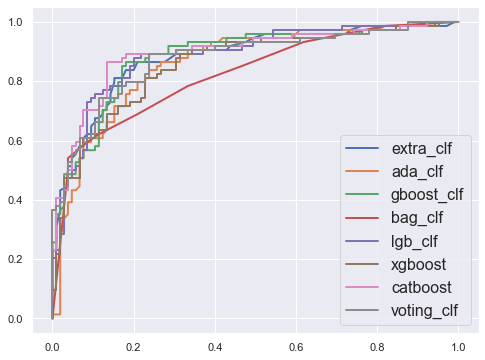

In [31]:
m.roc_curve_getter()

best models are LGBM(83.240223) AND randomforest(81.564246)

In [32]:
xxxxxxxxxxxxxx

NameError: name 'xxxxxxxxxxxxxx' is not defined

## Hyperparameter tuning for randomforest

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
import joblib 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, accuracy_score, classification_report 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = [ {'n_estimators': np.arange(80,150,10), 'max_features': ['auto']}]

forest_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,scoring='accuracy' ) 
grid_search.fit(X_train_prep, y_train)

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

In [ ]:
#grid_search.best_estimator
y_pred = grid_search.best_estimator_.predict(X_val_prep)
print('accuracy: ', accuracy_score(y_val, y_pred)*100, 'using ', grid_search.best_params_)
print(classification_report(y_val, y_pred))
y_scores = grid_search.best_estimator_.predict_proba(X_val_prep)[:, 1]
print('roc: ', roc_auc_score(y_val,y_scores)*100)


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

## hyperparameter tuning for lgbm

In [ ]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train_prep, y_train)
y_pred = lgb_clf.predict(X_val_prep)
accuracy= accuracy_score(y_val, y_pred)
c_matrix = confusion_matrix(y_val, y_pred)
print(accuracy*100)
print(c_matrix)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{ 'learning_rate': [0.02, 0.03, 0.1],
                    'n_estimators':  [100], 
                    'num_leaves':  [10, 20, 31] }]

grid_search = GridSearchCV(lgb_clf, param_grid, cv=5,
                       scoring='accuracy' ) #since we want more precision than recall
grid_search.fit(X_train_prep, y_train)

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

In [ ]:
final_model= grid_search.best_estimator_
joblib.dump(final_model, 'final_model.pkl')

## Submission

In [ ]:
sub_train= pd.read_csv('train.csv')
sub_train, sub_val = train_test_split(sub_train, test_size=0.2, random_state=42)
sub_test= pd.read_csv('test.csv')

In [ ]:
print(sub_train.shape)
print(sub_val.shape)
print(sub_test.shape)

In [ ]:
sub_train.head()

In [ ]:
pid_train= sub_train['PassengerId']
pid_val= sub_val['PassengerId']
pid_test= sub_test['PassengerId']

In [ ]:
pid_val=pd.DataFrame(pid_val, columns=['PassengerId']).reset_index(drop=True)
y_preds= pd.DataFrame(y_pred, columns=['Survived'])

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [ ]:
pid_test=pd.DataFrame(pid_test, columns=['PassengerId']).reset_index(drop=True)
y_preds= pd.DataFrame(y_pred, columns=['Survived'])

In [ ]:
submission= pd.concat([pid_test, y_preds], axis=1)

In [ ]:
submission.head()

In [ ]:
submission.to_csv('test_submission.csv', index= False)